<a href="https://colab.research.google.com/github/moncykurien/evaluation_projects/blob/main/Project14_RestaurantFoodCost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 14 - Restaurant Food Cost

Predict the Cost of a restaurant based on the following features.

## FEATURES:
1. TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
2. RESTAURANT_ID: A unique ID for each restaurant.
3. CUISINES: The variety of cuisines that the restaurant offers.
4. TIME: The open hours of the restaurant.
5. CITY: The city in which the restaurant is located.
6. LOCALITY: The locality of the restaurant.
7. RATING: The average rating of the restaurant by customers.
8. VOTES: The overall votes received by the restaurant.
9. COST: The average cost of a two-person meal.

## Importing Libraries

In [ ]:
!pip install category_encoders

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from category_encoders.hashing import HashingEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.stats import zscore

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegresso


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import joblib

import warnings

warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_excel('/content/Data_Train.xlsx')
df_train = train_data.copy()

In [3]:
test_data = pd.read_excel('/content/Data_Test.xlsx')
df_test = test_data.copy()

In [4]:
df_train.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
df_test.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


Observations:
1. Title has one or multiple values in it for a record.
2. RESTAURANT_ID seem to be the id of the restaurant which might be a unique identifier.
3. CUISINES seem to have one or multiple values for a record.
4. TIME contains opening and closing time, working days, morning or night information and could have more.
5. CITY gives the City information of the Restaurant.
6. LOCALITY gives the location information.
7. Rating has float values.
8. VOTES have integers and string.
9. COST contains the integer costs.


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [252]:
print(f"There are {df_train.shape[0]} rows and {df_train.shape[1]} columns in Train set.")

There are 12690 rows and 9 columns in Train set.


In [253]:
print(f"There are {df_test.shape[0]} rows and {df_test.shape[1]} columns in Test set.")

There are 4231 rows and 8 columns in Test set.


Observations:
1. Except RESTAURANT_ID and COST everything else is object.
2. There are some missing values.

In [8]:
df_train.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [9]:
df_test.isnull().sum()


TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

Observations:
1. Values from CITY, LOCALITY, RATING and VOTES are missing.

## Data Cleaning and Feature Engineering

#### Changing the column names to lower case for ease

In [10]:
df_tr = df_train.rename(lambda x: x.lower(), axis=1)
df_tr.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [11]:
df_ts = df_test.rename(lambda x: x.lower(), axis=1)
df_ts.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


#### title

In [12]:
df_tr.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [13]:
print(f"There are {df_tr['title'].nunique()} unique values in title in train set.")

There are 113 unique values in title in train set.


In [14]:
print(f"There are {df_ts['title'].nunique()} unique values in titlein test set.")

There are 86 unique values in titlein test set.


Observations:
1. The title variable contains atleast 113 categories if there are no category available only in test set. It would be great if we could reduce the number of categories for the sake of encoding.
2. Notice that there are some categories which are just a combination of different individual categories(for eg: CASUAL DINING,BAR in the 2nd row in train set.). These combinations are creating new categories. 
3. We should be able to reduce the number of categories if somehow we are able to separate these combinations into individual categories.
4. We can extract the restaurant type information from the title variable and create individual features for different items in the title where there is a combo value.

In [15]:
df_tr['title'].isnull().sum()

0

Observations:
1. Thera are no missing values in title.

In [16]:
max_num_titles = 0
for item in df_tr['title']:
  length = len(item.split(','))
  if length > max_num_titles:
    max_num_titles = length
for item in df_ts['title']:
  length = len(item.split(','))
  if length > max_num_titles:
    max_num_titles = length

print(f"There are a maximum of {max_num_titles} items in a single cell in the 'title' variable.")

There are a maximum of 2 items in a single cell in the 'title' variable.


Observations:
1. There are at a maximum 2 items in a single cell in the title variable.
2. So I will create two new features as rest_type1 and rest_type2 putting the 1st title in rest_type1 and the 2nd tite in rest_type2.

In [17]:
def extract_type(data_frame, inplace = False):
  if inplace:
    data_frame['rest_type1'] = data_frame['title'].apply(lambda x : 'NA' if x.split(',')[0] == 'None' else x.split(',')[0])
    data_frame['rest_type2'] = data_frame['title'].apply(lambda x : x.split(',')[1] if len(x.split(',')) == 2 else 'NA')
  else:
    df = data_frame.copy()
    df['rest_type1'] = df['title'].apply(lambda x : x.split(',')[0])
    df['rest_type2'] = df['title'].apply(lambda x : x.split(',')[1] if len(x.split(',')) == 2 else 'NA')
    return df
  


Observations:
1. There is a values 'None' in the title in testset. Need to check the train set also for None and convert it to np.nan in both train and test so that it can be treated as missing values and encoded as 0.

In [18]:
extract_type(df_tr, inplace=True)

In [19]:
df_tr.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NA
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NA
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NA
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NA


In [20]:
df_tr.isnull().sum()

title               0
restaurant_id       0
cuisines            0
time                0
city              112
locality           98
rating              2
votes            1204
cost                0
rest_type1          0
rest_type2          0
dtype: int64

Checking the number of categories now

In [21]:
df_tr['rest_type1'].nunique()

23

In [22]:
df_tr['rest_type2'].nunique()

20

Observations:
1. Notice that the number of categories have significantly decreased.

Extracting restaurant type in test set.

In [23]:
extract_type(df_ts, inplace=True)

In [24]:
df_ts.tail()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,rest_type1,rest_type2
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes,CASUAL DINING,NA
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes,NA,NA
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes,QUICK BITES,NA
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN,QUICK BITES,NA
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),Bandra West,Perry Cross Road,3.7,63 votes,QUICK BITES,NA


#### cuisines

In [25]:
df_tr['cuisines'].nunique()

4155

In [26]:
df_tr['cuisines'].value_counts()

South Indian                                                 532
North Indian                                                 526
North Indian, Chinese                                        501
Fast Food                                                    286
Chinese                                                      167
                                                            ... 
Bar Food, Fast Food, Chinese                                   1
North Indian, Thai, Chinese, Continental                       1
European, Continental, North Indian, Desserts                  1
Tibetan, Chinese, Continental, Momos                           1
Continental, Burger, American, South Indian, North Indian      1
Name: cuisines, Length: 4155, dtype: int64

Since there are some combo of individual categories, I would take a similar approach of title for the cuisines also.

In [27]:
max_num_cuisines = 0
for item in df_tr['cuisines']:
  length = len(item.split(','))
  if length > max_num_cuisines:
    max_num_cuisines = length
for item in df_ts['cuisines']:
  length = len(item.split(','))
  if length > max_num_cuisines:
    max_num_cuisines = length

print(f"There are a maximum of {max_num_cuisines} items in a single cell in the 'cuisines' variable.")

There are a maximum of 8 items in a single cell in the 'cuisines' variable.


Observations:
1. There are at a maximum 8 items in a single cell in the cuisines variable.
2. So I will create 8 new features as cuis_type1, cuis_type2, cuis_type3, cuis_type4, cuis_type5, cuis_type6, cuis_type7 and cuis_type8, putting each cuisine in each feature.

In [28]:
df_tr['cuisines'].isnull().sum()

0

In [29]:
df_ts['cuisines'].isnull().sum()

0

In [30]:
def extract_cuisine_type(data_frame, inplace = False):
  if inplace:
    data_frame['cuis_type1'] = data_frame['cuisines'].apply(lambda x : 'NA' if x.split(',')[0] == 'None' else x.split(',')[0].strip())
    data_frame['cuis_type2'] = data_frame['cuisines'].apply(lambda x : x.split(',')[1].strip() if len(x.split(',')) > 1 else 'NA')
    data_frame['cuis_type3'] = data_frame['cuisines'].apply(lambda x : x.split(',')[2].strip() if len(x.split(',')) > 2 else 'NA')
    data_frame['cuis_type4'] = data_frame['cuisines'].apply(lambda x : x.split(',')[3].strip() if len(x.split(',')) > 3 else 'NA')
    data_frame['cuis_type5'] = data_frame['cuisines'].apply(lambda x : x.split(',')[4].strip() if len(x.split(',')) > 4 else 'NA')
    data_frame['cuis_type6'] = data_frame['cuisines'].apply(lambda x : x.split(',')[5].strip() if len(x.split(',')) > 5 else 'NA')
    data_frame['cuis_type7'] = data_frame['cuisines'].apply(lambda x : x.split(',')[6].strip() if len(x.split(',')) > 6 else 'NA')
    data_frame['cuis_type8'] = data_frame['cuisines'].apply(lambda x : x.split(',')[7].strip() if len(x.split(',')) > 7 else 'NA')

  else:
    df = data_frame.copy()
    df['cuis_type1'] = df['cuisines'].apply(lambda x : 'NA' if x.split(',')[0] == 'None' else x.split(',')[0].strip())
    df['cuis_type2'] = df['cuisines'].apply(lambda x : x.split(',')[1].strip() if len(x.split(',')) > 1 else 'NA')
    df['cuis_type3'] = df['cuisines'].apply(lambda x : x.split(',')[2].strip() if len(x.split(',')) > 2 else 'NA')
    df['cuis_type4'] = df['cuisines'].apply(lambda x : x.split(',')[3].strip() if len(x.split(',')) > 3 else 'NA')
    df['cuis_type5'] = df['cuisines'].apply(lambda x : x.split(',')[4].strip() if len(x.split(',')) > 4 else 'NA')
    df['cuis_type6'] = df['cuisines'].apply(lambda x : x.split(',')[5].strip() if len(x.split(',')) > 5 else 'NA')
    df['cuis_type7'] = df['cuisines'].apply(lambda x : x.split(',')[6].strip() if len(x.split(',')) > 6 else 'NA')
    df['cuis_type8'] = df['cuisines'].apply(lambda x : x.split(',')[7].strip() if len(x.split(',')) > 7 else 'NA')
    return df
  


In [33]:
#Train set
extract_cuisine_type(df_tr, inplace=True)

#Test set
extract_cuisine_type(df_ts, inplace=True)

In [34]:
df_tr.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NA,Malwani,Goan,North Indian,NA,NA,NA,NA,NA
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NA,NA,NA,NA,NA
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,CASUAL DINING,NA,North Indian,Chinese,Biryani,Hyderabadi,NA,NA,NA,NA
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,QUICK BITES,NA,Tibetan,Chinese,NA,NA,NA,NA,NA,NA
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,DESSERT PARLOR,NA,Desserts,NA,NA,NA,NA,NA,NA,NA


In [35]:
df_ts.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,CASUAL DINING,NA,North Indian,Chinese,Mughlai,Kebab,NA,NA,NA,NA
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,QUICK BITES,NA,South Indian,Fast Food,Pizza,North Indian,NA,NA,NA,NA
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,CASUAL DINING,NA,North Indian,Seafood,Biryani,Chinese,NA,NA,NA,NA
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,NA,NA,Biryani,NA,NA,NA,NA,NA,NA,NA
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,QUICK BITES,NA,South Indian,Kerala,NA,NA,NA,NA,NA,NA


In [36]:
df_tr[(df_tr['cuis_type8']=='') | (df_tr['cuis_type7']=='') | (df_tr['cuis_type6']=='') | (df_tr['cuis_type5']=='') | (df_tr['cuis_type4']=='') | (df_tr['cuis_type3']=='') | (df_tr['cuis_type2']=='') | (df_tr['cuis_type1']=='')].shape

(78, 19)

In [37]:
df_ts[(df_ts['cuis_type8']=='') | (df_ts['cuis_type7']=='') | (df_ts['cuis_type6']=='') | (df_ts['cuis_type5']=='') | (df_ts['cuis_type4']=='') | (df_ts['cuis_type3']=='') | (df_ts['cuis_type2']=='') | (df_ts['cuis_type1']=='')].shape

(34, 18)

Observations:
1. There are some empty spaces in the Cuisines which has given empty spaces in the new Features.

Convert the empty spaces into NA.

In [38]:
columns = ['cuis_type1','cuis_type2','cuis_type3','cuis_type4','cuis_type5','cuis_type6','cuis_type7','cuis_type8']
for col in columns:
  df_tr.at[(df_tr[col]=='')|(df_tr[col]==' '), col] = 'NA'
  df_ts.at[(df_ts[col]=='')|(df_ts[col]==' '), col] = 'NA'

In [39]:
df_tr[(df_tr['cuis_type8']=='') | (df_tr['cuis_type7']=='') | (df_tr['cuis_type6']=='') | (df_tr['cuis_type5']=='') | (df_tr['cuis_type4']=='') | (df_tr['cuis_type3']=='') | (df_tr['cuis_type2']=='') | (df_tr['cuis_type1']=='')].shape

(0, 19)

In [40]:
df_ts[(df_ts['cuis_type8']=='') | (df_ts['cuis_type7']=='') | (df_ts['cuis_type6']=='') | (df_ts['cuis_type5']=='') | (df_ts['cuis_type4']=='') | (df_ts['cuis_type3']=='') | (df_ts['cuis_type2']=='') | (df_ts['cuis_type1']=='')].shape

(0, 18)

Verifying NA in Train and Test for Cuisine related features.

In [43]:
df_tr[df_tr['restaurant_id']==15521]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
12358,CASUAL DINING,15521,"North Indian, Maharashtrian, Konkan, Mangalore...","12noon – 4pm, 4pm – 7pm, 7pm – 12midnight...",Mumbai,Chandivali,4.3,176 votes,600,CASUAL DINING,NA,North Indian,Maharashtrian,Konkan,Mangalorean,Malwani,Seafood,NA,NA


In [44]:
df_ts[df_ts['restaurant_id']==10242]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
396,CASUAL DINING,10242,"Seafood, Mexican, Biryani, South Indian, Chett...","12noon – 3pm, 7pm – 11pm (Mon-Sun)",Kochi,Kaloor,3.5,14 votes,CASUAL DINING,NA,Seafood,Mexican,Biryani,South Indian,Chettinad,North Indian,NA,NA


#### city

In [45]:
df_tr['city'].isnull().sum()

112

Observations:
1. There are missing values in city. Filling them with NA.

In [47]:
df_tr['city'].fillna('NA',inplace=True)
df_ts['city'].fillna('NA',inplace=True)

In [48]:
df_tr['city'].isnull().sum()

0

In [49]:
df_ts['city'].isnull().sum()

0

In [50]:
df_tr['city'].nunique()

360

In [51]:
df_ts['city'].nunique()

152

Observations:
1. There are 360 categories in Trainset and 152 categories in Testset for 'city' variable. Large number of categories.

In [55]:
df_tr['city'].value_counts().head(25)

Chennai          2174
Bangalore        2149
Hyderabad        1819
Mumbai           1722
New Delhi        1321
Kochi            1279
Gurgaon           379
Secunderabad      310
Noida             211
Navi Mumbai       165
NA                112
Ghaziabad         102
Thane              97
Faridabad          79
Bandra West        69
Thane West         52
Andheri West       48
Bengaluru          42
Greater Noida      31
India              23
Kakkanad           15
Ernakulam          14
Kerala             10
Dwarka             10
Delhi NCR           9
Name: city, dtype: int64

In [56]:
df_ts['city'].value_counts().head(25)

Bangalore        686
Chennai          681
Hyderabad        639
Mumbai           589
Kochi            472
New Delhi        433
Gurgaon          145
Secunderabad      86
Noida             63
Navi Mumbai       57
NA                35
Ghaziabad         30
Faridabad         30
Andheri West      21
Thane West        21
Thane             21
Bengaluru         19
Bandra West       16
India              8
Greater Noida      7
Dwarka             5
Kakkanad           5
Delhi NCR          4
Banglore           4
Ernakulam          4
Name: city, dtype: int64

Observations:
1. There are many mixed up values in here. If this is cleaned the nunber of categories in 'city' will definitely decrease.
2. Some of the values are just locations within cities and not the actual city name. We have scope for grouping.

In [59]:
max_num_cities = 0
for item in df_tr['city']:
  length = len(item.split(','))
  if length > max_num_cities:
    max_num_cities = length
for item in df_ts['city']:
  length = len(item.split(','))
  if length > max_num_cities:
    max_num_cities = length

print(f"There are a maximum of {max_num_cities} items in a single cell in the 'city' variable.")

There are a maximum of 1 items in a single cell in the 'city' variable.


Observations:
1. Its good that there are only single values in each record for city.

Intuition:
1. It would make sense to group the categories under a few frequent city categories instead of having so many categories.

In [60]:
def group_cities(data_frame):

  df=data_frame.copy()
  kochi = ['kochi','ernakulam','kerala','kakkanad','edappally','Palarivattom','Aluva','Kaloor','Panampilly','Velachery','Vyttila','Kadavanthra','Pallimukku','Thykoodam']
  delhi = ['delhi','India','Vihar','Saket','karol']
  bangalore = ['bangalore','banglor','bengaluru','Bengalore','Layout','560043','Indiranagar','Karnataka']
  chennai=['chennai','tamil','sholing','naval','mg road','vadap','GST','Kilpauk','Ramapuram','Ambattur','Anna','Medavakkam','Mahabalipuram','Avadi','potheri','perumb','Besant','Perungudi','Nungambakkam','Chromepet','Tambaram','Nandanam','Nallathambi','Thiruvanmiyur','Maharaja','ECR','Chenn','Pallavaram']
  mumbai = ['mumbai','thane','andheri','bandra','Maharashtra','Powai','Kalyan','Virar','Mulund']
  gurgaon = ['gurgaon','Gurugram','Rodeo','gaon','sector']
  secunderabad = ['secunderabad']
  hyderabad = ['Hyderabad','TCS','telan','Manikonda','telen','jubilee','Madhapur','Gachibowli','Kondapur','Kothaguda','Banjara','Lingampally','Kukatpally','Himayath','Mehdipatnam','Telagana','Khairatabad','Ramanthapur','Gandipet']
  noida = ['noida']
  faridabad=['Farid']

  df.at[df['city'].str.contains('|'.join(kochi), case=False), 'city'] ='kochi'
  df.at[df['city'].str.contains('|'.join(delhi), case=False), 'city'] ='delhi'
  df.at[df['city'].str.contains('|'.join(bangalore), case=False), 'city'] ='bangalore'
  df.at[df['city'].str.contains('|'.join(chennai), case=False), 'city'] ='chennai'
  df.at[df['city'].str.contains('|'.join(mumbai), case=False), 'city'] ='mumbai'
  df.at[df['city'].str.contains('|'.join(gurgaon), case=False), 'city'] ='gurgaon'
  df.at[df['city'].str.contains('|'.join(secunderabad), case=False), 'city'] ='secunderabad'
  df.at[df['city'].str.contains('|'.join(hyderabad), case=False), 'city'] ='hyderabad'
  df.at[df['city'].str.contains('|'.join(noida), case=False), 'city'] ='noida'
  df.at[df['city'].str.contains('|'.join(faridabad), case=False), 'city'] ='faridabad'
  df.at[~df['city'].isin(['kochi','delhi','bangalore','chennai','mumbai','gurgaon','secunderabad','hyderabad','noida','faridabad','NA']), 'city'] = 'others'

  return df

In [61]:
#Train set
df_tr = group_cities(df_tr)

#Test set
df_ts = group_cities(df_ts)

In [62]:
df_tr['city'].value_counts()

chennai         2244
bangalore       2235
mumbai          2196
hyderabad       1886
delhi           1378
kochi           1374
gurgaon          394
secunderabad     314
noida            242
others           235
NA               112
faridabad         80
Name: city, dtype: int64

In [63]:
df_ts['city'].value_counts()

mumbai          746
bangalore       717
chennai         703
hyderabad       654
kochi           502
delhi           451
gurgaon         149
secunderabad     87
others           86
noida            71
NA               35
faridabad        30
Name: city, dtype: int64

Observations:
1. The categories are grouped and number of categories in city reduced.

#### locality

There are some null values in the 'locality' variable. Filling those with NA.

In [73]:
#Train set
df_tr['locality'].fillna('NA', inplace = True)

#Test set
df_ts['locality'].fillna('NA',inplace=True)

In [74]:
df_tr['locality'].isnull().sum()

0

In [75]:
df_ts['locality'].isnull().sum()

0

In [76]:
df_tr['locality'].nunique()

1417

In [77]:
df_ts['locality'].nunique()

835

Observations:
1. There are 1417 categories in train set locality and 835 categories in test set locality.

In [78]:
df_tr['locality'].value_counts()

Gachibowli                   166
Indiranagar                  138
Edappally                    122
Kakkanad                     121
HSR                          120
                            ... 
Gol Chakkar Malviya Nagar      1
Near Pitampura                 1
Sector 47                      1
Sector PI                      1
Kumarswamy Layout              1
Name: locality, Length: 1417, dtype: int64

In [79]:
df_ts['locality'].value_counts()

Kakkanad            54
Kukatpally          54
Whitefield          53
Madhapur            52
Gachibowli          50
                    ..
Govind Puram         1
ITPL Main Road       1
Sector 15 Part 1     1
Ulwe                 1
Ernakulam South      1
Name: locality, Length: 835, dtype: int64

Observations:
1. The categories within the locality variable are from various part of India most of which I am not sure where they are.

In [80]:
max_num_localities = 0
for item in df_tr['locality']:
  length = len(item.split(','))
  if length > max_num_localities:
    max_num_localities = length
for item in df_ts['locality']:
  length = len(item.split(','))
  if length > max_num_localities:
    max_num_localities = length

print(f"There are a maximum of {max_num_localities} items in a single cell in the 'locality' variable.")

There are a maximum of 1 items in a single cell in the 'locality' variable.


In [81]:
df_tr['locality'].value_counts()[df_tr['locality'].value_counts()==1].shape

(702,)

In [82]:
df_ts['locality'].value_counts()[df_ts['locality'].value_counts()==1].shape

(355,)

Observations:
1. There are so many unique values in 'locality' and there are many values that occur only once.
2. Since these are indicidual localities and I am not aware of most of the geo-locations of those localities, I prefer to leave the categories as they are.

#### Rating

In [83]:
df_tr['rating'].dtypes

dtype('O')

In [84]:
df_ts['rating'].dtypes

dtype('O')

Observations:
1. The 'ratings' is an object type. Convert it to float.

In [85]:
df_tr['rating'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [86]:
df_ts['rating'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', 'NEW', '4.0', '3.4', '3.2',
       '4.1', '3.0', '-', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5',
       '2.8', '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7',
       '2.3', '2.4', '2.2', nan], dtype=object)

Observations:
1. There are some non numeric values in 'rating' like '-' and 'NEW' and then there are some NaN values.

Train set

In [87]:
df_tr[df_tr['rating']=='-']

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
13,CASUAL DINING,4319,South Indian,11am – 11:30pm (Mon-Sun),kochi,Edappally,-,NaN,400,CASUAL DINING,NA,South Indian,NA,NA,NA,NA,NA,NA,NA
85,QUICK BITES,12657,"North Indian, South Indian","Closed (Mon),7:30am – 10:30pm (Tue-Sun)",bangalore,Vijay Nagar,-,NaN,300,QUICK BITES,NA,North Indian,South Indian,NA,NA,NA,NA,NA,NA
156,QUICK BITES,6302,South Indian,6am – 8pm (Mon-Sun),kochi,Vyttila,-,NaN,400,QUICK BITES,NA,South Indian,NA,NA,NA,NA,NA,NA,NA
178,CASUAL DINING,14064,"Indian, Chinese",12noon – 11:30pm (Mon-Sun),kochi,Vennala,-,NaN,400,CASUAL DINING,NA,Indian,Chinese,NA,NA,NA,NA,NA,NA
235,QUICK BITES,14990,Kerala,8am – 7pm (Mon-Sun),kochi,Near Marine Drive,-,NaN,50,QUICK BITES,NA,Kerala,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12584,QUICK BITES,11842,"Kerala, Biryani",8am – 10pm (Mon-Sun),kochi,Panampilly Nagar,-,NaN,300,QUICK BITES,NA,Kerala,Biryani,NA,NA,NA,NA,NA,NA
12585,CASUAL DINING,5878,Kerala,6am – 4pm (Mon-Sun),kochi,Elamkulam,-,NaN,400,CASUAL DINING,NA,Kerala,NA,NA,NA,NA,NA,NA,NA
12591,BEVERAGE SHOP,1167,"Beverages, Juices, Desserts",9am – 10pm (Mon-Sun),kochi,Edappally,-,NaN,150,BEVERAGE SHOP,NA,Beverages,Juices,Desserts,NA,NA,NA,NA,NA
12641,CASUAL DINING,8312,Kerala,7:30am – 11:30pm (Mon-Sun),kochi,Pallimukku,-,NaN,300,CASUAL DINING,NA,Kerala,NA,NA,NA,NA,NA,NA,NA


In [88]:
df_tr[df_tr['rating']=='NEW']

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
62,QUICK BITES,7841,"North Indian, Beverages",11am – 11pm (Mon-Sun),kochi,Kalamassery,NEW,NaN,200,QUICK BITES,NA,North Indian,Beverages,NA,NA,NA,NA,NA,NA
69,None,11096,"Pizza, Fast Food",11am – 11pm (Mon-Sun),delhi,Kalkaji,NEW,NaN,200,NA,NA,Pizza,Fast Food,NA,NA,NA,NA,NA,NA
111,CASUAL DINING,7095,"Gujarati, Rajasthani, North Indian","11:30am – 3:30pm, 7pm – 11pm (Mon-Sun)",mumbai,Borivali West,NEW,NaN,800,CASUAL DINING,NA,Gujarati,Rajasthani,North Indian,NA,NA,NA,NA,NA
117,QUICK BITES,8091,"North Indian, Chinese",11am – 11pm (Mon-Sun),delhi,Dwarka,NEW,NaN,500,QUICK BITES,NA,North Indian,Chinese,NA,NA,NA,NA,NA,NA
120,QUICK BITES,4993,"North Indian, South Indian","7:30am – 9:30pm (Mon-Sat),Closed (Sun)",bangalore,Whitefield,NEW,NaN,150,QUICK BITES,NA,North Indian,South Indian,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12602,QUICK BITES,11176,"Rolls, North Indian, Biryani",12noon – 12midnight (Mon-Sun),mumbai,Mahakali,NEW,NaN,200,QUICK BITES,NA,Rolls,North Indian,Biryani,NA,NA,NA,NA,NA
12613,CASUAL DINING,397,"Asian, Thai, Sushi, Healthy Food",12noon – 11pm (Mon-Sun),gurgaon,DLF Phase 4,NEW,NaN,950,CASUAL DINING,NA,Asian,Thai,Sushi,Healthy Food,NA,NA,NA,NA
12630,CASUAL DINING,9959,"Tex-Mex, Italian, Coffee",8am – 10:30pm (Mon-Sun),gurgaon,Golf Course Road,NEW,NaN,1200,CASUAL DINING,NA,Tex-Mex,Italian,Coffee,NA,NA,NA,NA,NA
12658,None,9384,"Kerala, South Indian",11am – 5pm (Mon-Sun),kochi,Chittoor Road,NEW,NaN,400,NA,NA,Kerala,South Indian,NA,NA,NA,NA,NA,NA


In [89]:
df_tr[df_tr['rating'].isnull()]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
204,BAKERY,15062,Bakery,Not Available,kochi,Marine Drive,NaN,NaN,200,BAKERY,NA,Bakery,NA,NA,NA,NA,NA,NA,NA
421,CAFÉ,14127,"Cafe, Fast Food",Not Available,hyderabad,Banjara Hills,NaN,NaN,350,CAFÉ,NA,Cafe,Fast Food,NA,NA,NA,NA,NA,NA


Test set

In [90]:
df_ts[df_ts['rating']=='-']

,title,restaurant_id,cuisines,time,city,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
37,QUICK BITES,5854,"Kerala, Fast Food",5am – 9pm (Mon-Sun),kochi,Edappally,-,NaN,QUICK BITES,NA,Kerala,Fast Food,NA,NA,NA,NA,NA,NA
66,QUICK BITES,414,South Indian,10am – 10pm (Mon-Sun),kochi,Pallimukku,-,NaN,QUICK BITES,NA,South Indian,NA,NA,NA,NA,NA,NA,NA
73,QUICK BITES,3331,"Kerala, South Indian",Not Available,kochi,Thevera,-,NaN,QUICK BITES,NA,Kerala,South Indian,NA,NA,NA,NA,NA,NA
108,BAKERY,1323,Bakery,9:30am – 10:30pm (Mon-Sun),kochi,Thopumpady,-,NaN,BAKERY,NA,Bakery,NA,NA,NA,NA,NA,NA,NA
130,BEVERAGE SHOP,6507,Beverages,9am – 8:30pm (Mon-Sun),kochi,Marine Drive,-,NaN,BEVERAGE SHOP,NA,Beverages,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4026,QUICK BITES,1278,"Chinese, South Indian",10am – 9pm (Mon-Sun),kochi,Kaloor,-,NaN,QUICK BITES,NA,Chinese,South Indian,NA,NA,NA,NA,NA,NA
4030,CASUAL DINING,5915,"Kerala, Biryani",7am – 11pm (Mon-Sun),kochi,Kacheripady,-,NaN,CASUAL DINING,NA,Kerala,Biryani,NA,NA,NA,NA,NA,NA
4109,CASUAL DINING,3829,"Italian, Desserts, Continental",10am – 12midnight (Mon-Sun),others,Near Express Garden,-,NaN,CASUAL DINING,NA,Italian,Desserts,Continental,NA,NA,NA,NA,NA
4172,QUICK BITES,5365,"North Indian, Chinese, Kerala",9am – 11pm (Mon-Sun),kochi,Palarivattom,-,NaN,QUICK BITES,NA,North Indian,Chinese,Kerala,NA,NA,NA,NA,NA


In [91]:
df_ts[df_ts['rating']=='NEW']

,title,restaurant_id,cuisines,time,city,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
6,CASUAL DINING,1643,"North Indian, Street Food, Fast Food","12noon – 3:30pm, 7pm – 11:30pm (Mon-Sun)",mumbai,Kharghar,NEW,NaN,CASUAL DINING,NA,North Indian,Street Food,Fast Food,NA,NA,NA,NA,NA
21,CASUAL DINING,3852,"North Indian, South Indian",12noon – 11pm (Mon-Sun),chennai,Anna Salai,NEW,NaN,CASUAL DINING,NA,North Indian,South Indian,NA,NA,NA,NA,NA,NA
24,QUICK BITES,8102,"Biryani, Andhra, North Indian",11am – 11pm (Mon-Sun),bangalore,Banaswadi,NEW,NaN,QUICK BITES,NA,Biryani,Andhra,North Indian,NA,NA,NA,NA,NA
27,CASUAL DINING,4696,"Continental, Italian","11am – 12midnight (Mon-Thu),11am – 1am (Fri-Sun)",bangalore,BTM,NEW,NaN,CASUAL DINING,NA,Continental,Italian,NA,NA,NA,NA,NA,NA
29,QUICK BITES,14208,"North Indian, Chinese",12noon – 1am (Mon-Sun),mumbai,Bandra West,NEW,NaN,QUICK BITES,NA,North Indian,Chinese,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4181,CASUAL DINING,681,"American, Italian",7pm – 1am (Mon-Sun),mumbai,Fort,NEW,NaN,CASUAL DINING,NA,American,Italian,NA,NA,NA,NA,NA,NA
4183,CAFÉ,7007,"Cafe, North Indian",11am – 11pm (Mon-Sun),noida,Sector 63,NEW,NaN,CAFÉ,NA,Cafe,North Indian,NA,NA,NA,NA,NA,NA
4185,QUICK BITES,6387,Fast Food,12:30pm – 10:30pm (Mon-Sun),delhi,Shalimar Bagh,NEW,NaN,QUICK BITES,NA,Fast Food,NA,NA,NA,NA,NA,NA,NA
4198,QUICK BITES,13381,Continental,11am – 12midnight (Mon-Sun),bangalore,Indiranagar,NEW,NaN,QUICK BITES,NA,Continental,NA,NA,NA,NA,NA,NA,NA


In [92]:
df_ts[df_ts['rating'].isnull()]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
2035,QUICK BITES,2776,"Kerala, Arabian",Not Available,kochi,Kakkanad,NaN,NaN,QUICK BITES,NA,Kerala,Arabian,NA,NA,NA,NA,NA,NA
2758,None,11301,"Chinese, North Indian, South Indian",Not Available,kochi,Tripunithura,NaN,NaN,NA,NA,Chinese,North Indian,South Indian,NA,NA,NA,NA,NA


Observations:
1. There are invalid values like '-'. And then there are 'NEW' in the rating variable.
2. Change those invalid values to NaNs.

In [93]:
df_tr.at[(df_tr['rating']=='-') | (df_tr['rating']=='NEW'), 'rating'] = np.nan
df_ts.at[(df_ts['rating']=='-') | (df_ts['rating']=='NEW'), 'rating'] = np.nan

In [94]:
df_tr['rating'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', nan,
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', '3.1', '2.5', '4.6',
       '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4', '2.3',
       '2.0', '2.1', '2.2'], dtype=object)

In [95]:
df_ts['rating'].unique()

array(['4.3', '4.2', '3.8', '3.6', '3.7', nan, '4.0', '3.4', '3.2', '4.1',
       '3.0', '3.5', '4.5', '3.9', '3.3', '2.9', '3.1', '2.5', '2.8',
       '4.6', '4.4', '2.7', '4.8', '2.6', '4.9', '2.1', '4.7', '2.3',
       '2.4', '2.2'], dtype=object)

Now the variable can be converted into a float variable.

In [96]:
df_tr['rating'] = df_tr['rating'].astype('float')
df_ts['rating'] = df_tr['rating'].astype('float')

In [97]:
df_tr['rating'].dtype

dtype('float64')

In [98]:
df_ts['rating'].dtype

dtype('float64')

#### votes

In [99]:
df_tr.head(2)

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",mumbai,Dombivali East,3.6,49 votes,1200,CASUAL DINING,NA,Malwani,Goan,North Indian,NA,NA,NA,NA,NA
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),chennai,Ramapuram,4.2,30 votes,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NA,NA,NA,NA,NA


In [100]:
df_tr['votes'].isnull().sum()

1204

Observations:
1. The 'votes' contain alphanumeric values. The text from the values must be removed and the 'votes' variable must be made an int type.
2. There are missing values in 'votes'. I am going to fill the missing values with 0 since it actually means there are no votes.

In [101]:
#Train set
df_tr['votes'] = df_tr['votes'].apply(lambda x: 0 if ((x == np.nan) | (str(x)=='nan')) else str(x).split(' ')[0].strip()).astype('int')

#Test set
df_ts['votes'] = df_ts['votes'].apply(lambda x: 0 if ((x == np.nan) | (str(x)=='nan')) else str(x).split(' ')[0].strip()).astype('int')

verifying train set

In [105]:
df_tr['votes'].dtypes

dtype('int64')

In [108]:
df_tr.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",mumbai,Dombivali East,3.6,49,1200,CASUAL DINING,NA,Malwani,Goan,North Indian,NA,NA,NA,NA,NA
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NA,NA,NA,NA,NA
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",chennai,Saligramam,3.8,221,800,CASUAL DINING,NA,North Indian,Chinese,Biryani,Hyderabadi,NA,NA,NA,NA
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),mumbai,Bandra West,4.1,24,800,QUICK BITES,NA,Tibetan,Chinese,NA,NA,NA,NA,NA,NA
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,NA,Desserts,NA,NA,NA,NA,NA,NA,NA


Verifying Test set

In [106]:
df_ts['votes'].dtypes

dtype('int64')

In [109]:
df_ts.head()

,title,restaurant_id,cuisines,time,city,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),noida,Sector 18,3.6,564,CASUAL DINING,NA,North Indian,Chinese,Mughlai,Kebab,NA,NA,NA,NA
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),mumbai,Grant Road,4.2,61,QUICK BITES,NA,South Indian,Fast Food,Pizza,North Indian,NA,NA,NA,NA
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),mumbai,Marine Lines,3.8,350,CASUAL DINING,NA,North Indian,Seafood,Biryani,Chinese,NA,NA,NA,NA
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",faridabad,NIT,4.1,1445,NA,NA,Biryani,NA,NA,NA,NA,NA,NA,NA
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),kochi,Kaloor,3.8,23,QUICK BITES,NA,South Indian,Kerala,NA,NA,NA,NA,NA,NA


##### Filling missing values in rating based on votes

Intuition:
1. Now that we have the votes, we can look at the missing values in rating and fill them based on the votes.
1. If there are 0 votes, Ill fill rating as 0 and if there are more than 0 votes, Ill use the mean to fill that rating.

Train set

In [110]:
df_tr[df_tr['rating'].isnull()]['votes'].unique()

array([0])

In [111]:
df_tr[df_tr['votes']!=0]['rating'].unique()

array([3.6, 4.2, 3.8, 4.1, 4. , 4.3, 3.9, 3.3, 3.4, 4.5, 3.5, 4.4, 2.7,
       3.7, 4.7, 3.1, 2.5, 4.6, 2.8, 3. , 3.2, 2.6, 2.9, 4.9, 4.8, 2.4,
       2.3, 2. , 2.1, 2.2])

In [112]:
df_tr[(df_tr['rating'].isnull()) & (df_tr['votes']!=0)]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8


Observations:
1. All the nans in Rating in the train set are for records that have 'votes' as 0. Meaning there are no votes for these restaurants hence the ratings can be defaulted to 0.

In [113]:
df_tr['rating'].fillna(0, inplace=True)  #filling missing values with 0 since there are no votes for these records

In [114]:
df_tr['rating'].isnull().sum()

0

Test set

In [115]:
df_ts[df_ts['rating'].isnull()]['votes'].unique()

array([  100,   467,    58,    44,    50,    33,    13,   583,    14,
         133,     0,   172,    23,   104,   213,   884,   708,    85,
          94,    98,   125,  2143,   758,   293,    25,    42,   108,
         106,    12,    21,   138,   140,   513,   103,   313,   599,
          79,   101,   128,    18,   519,   431,    45,   159,    46,
        1270,   107,   703,   421,  1114,  1014,   242,   215,   297,
        1613,   346,   474,   585,     9,   887,    11,   437,   147,
         228,   457,    78,  1786,  2220,   476,    57,   330,   238,
        2400,    74,    56,   743,    26,   121,     5,   380,   352,
          47,   902,  1896,   185,   154,   809,  1943,   332,     8,
          72,   872,   344,   370,   448,  1648,   578,  2787,  1055,
          91,   429,   301,   266,   328,    54,   378,    16,    24,
        2566,  1046,    84,    19,     6,  1452,    55,   251,   277,
          41,  2503,   122,    15,   390,    52,  1469,    61,    89,
         478,   342,

In [116]:
df_ts[(df_ts['rating'].isnull())&(df_ts['votes']==0)].shape

(40, 18)

In [117]:
df_ts[(df_ts['rating'].isnull())&(df_ts['votes']>0)].shape

(358, 18)

Observations:
1. In case of test set, there are 358 records that have votes but no ratings. For these records, I will fill the NaNs with the mean rating from train set assuming that we have not seen the test set.
2. In test set for records that have votes as 0 and rating is missing, I'll use 0 to fill the missing values.

filling missing values with 0 since these records have no votes.

In [118]:
df_ts.at[(df_ts['rating'].isnull())&(df_ts['votes']==0), 'rating'] = 0 

In [119]:
df_ts[(df_ts['rating'].isnull())&(df_ts['votes']==0)]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8


Filling the missing rating in test set with TRAIN SET's rating mean for records that have votes > 0

In [124]:
print(f"The rating mean in the train set is: {round(df_tr['rating'].mean(),1)}")

The rating mean in the train set is: 3.4


In [122]:
df_ts['rating'].fillna(round(df_tr['rating'].mean(),1), inplace=True)   #filling missing values with rating mean form train set since these records have votes > 0.

In [126]:
df_ts['rating'].isnull().sum()

0

Verifying train and test sets for Null values

In [127]:
df_tr.isnull().sum().sum()

0

In [128]:
df_ts.isnull().sum().sum()

0

Observations:
1. There are no missing values in the datasets now.

#### Time

In [129]:
print(f"There are {df_tr['time'].nunique()} unique values in trainset's time.")

There are 2689 unique values in trainset's time.


Investigating the time variable.

In [130]:
df_tr['time']

0                  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)
1                                    6pm – 11pm (Mon-Sun)
2                     11am – 3:30pm, 7pm – 11pm (Mon-Sun)
3                                 11:30am – 1am (Mon-Sun)
4                                    11am – 1am (Mon-Sun)
                               ...                       
12685    12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...
12686     12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...
12687                          12noon – 12:30AM (Mon-Sun)
12688                             6am – 10:45pm (Mon-Sun)
12689                            12:30pm – 11pm (Mon-Sun)
Name: time, Length: 12690, dtype: object

In [131]:
df_tr[['time']].iloc[np.r_[15:30,-115:-100]]

,time
15,"11:30am – 11:30pm (Mon, Tue, Wed, Thu, Sun)..."
16,7:30am – 12midnight (Mon-Sun)
17,11am – 12midnight (Mon-Sun)
18,11am – 11:45pm (Mon-Sun)
19,"Closed (Mon),9am – 10pm (Tue-Sun)"
20,9:30am – 10pm (Mon-Sun)
21,10:30am – 11:30pm (Mon-Sun)
22,11am – 3am (Mon-Sun)
23,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)"
24,11am – 11pm (Mon-Sun)


In [132]:
df_tr['time'].value_counts()

11am – 11pm (Mon-Sun)                                1415
12noon – 12midnight (Mon-Sun)                         469
12noon – 11pm (Mon-Sun)                               407
11am – 12midnight (Mon-Sun)                           310
10am – 10pm (Mon-Sun)                                 221
                                                     ... 
1pm – 1am (Mon-Fri),12:30pm – 1am (Sat-Sun)             1
6:30am – 10:30am, 12:15pm – 1pm, 7pm – 11pm...          1
8:30am – 1:30am (Mon-Sun)                               1
11am – 11:30pm (Mon-Thu),10am – 12:30AM (Fri-Sun)       1
7am – 10:15pm (Mon-Sun)                                 1
Name: time, Length: 2689, dtype: int64

In [133]:
max_num_items = 0
for item in df_tr['time']:
  length = len(item.split(','))
  if length > max_num_items:
    max_num_items = length
for item in df_ts['time']:
  length = len(item.split(','))
  if length > max_num_items:
    max_num_items = length

print(f"There are a maximum of {max_num_items} items in a single cell in the 'time' variable.")

There are a maximum of 7 items in a single cell in the 'time' variable.


Observations:
1. I'll create 7 new features and try to extract the information in time.

In [134]:
def extract_working_time(data_frame, inplace = False):
  if inplace:
    data_frame['time1'] = data_frame['time'].apply(lambda x : 'NA' if x.split(',')[0] == 'None' else x.split(',')[0].strip())
    data_frame['time2'] = data_frame['time'].apply(lambda x : x.split(',')[1].strip() if len(x.split(',')) > 1 else 'NA')
    data_frame['time3'] = data_frame['time'].apply(lambda x : x.split(',')[2].strip() if len(x.split(',')) > 2 else 'NA')
    data_frame['time4'] = data_frame['time'].apply(lambda x : x.split(',')[3].strip() if len(x.split(',')) > 3 else 'NA')
    data_frame['time5'] = data_frame['time'].apply(lambda x : x.split(',')[4].strip() if len(x.split(',')) > 4 else 'NA')
    data_frame['time6'] = data_frame['time'].apply(lambda x : x.split(',')[5].strip() if len(x.split(',')) > 5 else 'NA')
    data_frame['time7'] = data_frame['time'].apply(lambda x : x.split(',')[6].strip() if len(x.split(',')) > 6 else 'NA')
    columns = ['time1','time2','time3','time4','time5','time6','time7']
    for col in columns:
      data_frame.at[(data_frame[col]=='')|(data_frame[col]==' '), col] = 'NA'
      
  else:
    df = data_frame.copy()
    df['time1'] = df['time'].apply(lambda x : 'NA' if x.split(',')[0] == 'None' else x.split(',')[0].strip())
    df['time2'] = df['time'].apply(lambda x : x.split(',')[1].strip() if len(x.split(',')) > 1 else 'NA')
    df['time3'] = df['time'].apply(lambda x : x.split(',')[2].strip() if len(x.split(',')) > 2 else 'NA')
    df['time4'] = df['time'].apply(lambda x : x.split(',')[3].strip() if len(x.split(',')) > 3 else 'NA')
    df['time5'] = df['time'].apply(lambda x : x.split(',')[4].strip() if len(x.split(',')) > 4 else 'NA')
    df['time6'] = df['time'].apply(lambda x : x.split(',')[5].strip() if len(x.split(',')) > 5 else 'NA')
    df['time7'] = df['time'].apply(lambda x : x.split(',')[6].strip() if len(x.split(',')) > 6 else 'NA')
    columns = ['time1','time2','time3','time4','time5','time6','time7']
    for col in columns:
      df.at[(df[col]=='')|(df[col]==' '), col] = 'NA'
    return df
  


In [136]:
#Train set
df_tr = extract_working_time(df_tr)

#Test set
df_ts = extract_working_time(df_ts)

Verifying Train set

In [137]:
df_tr.iloc[np.r_[0:5,-5:0]]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8,time1,time2,time3,time4,time5,time6,time7
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",mumbai,Dombivali East,3.6,49,1200,CASUAL DINING,NA,Malwani,Goan,North Indian,NA,NA,NA,NA,NA,11am – 4pm,7:30pm – 11:30pm (Mon-Sun),NA,NA,NA,NA,NA
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NA,NA,NA,NA,NA,6pm – 11pm (Mon-Sun),NA,NA,NA,NA,NA,NA
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",chennai,Saligramam,3.8,221,800,CASUAL DINING,NA,North Indian,Chinese,Biryani,Hyderabadi,NA,NA,NA,NA,11am – 3:30pm,7pm – 11pm (Mon-Sun),NA,NA,NA,NA,NA
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),mumbai,Bandra West,4.1,24,800,QUICK BITES,NA,Tibetan,Chinese,NA,NA,NA,NA,NA,NA,11:30am – 1am (Mon-Sun),NA,NA,NA,NA,NA,NA
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,NA,Desserts,NA,NA,NA,NA,NA,NA,NA,11am – 1am (Mon-Sun),NA,NA,NA,NA,NA,NA
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",hyderabad,Gachibowli,3.8,546,500,QUICK BITES,NA,North Indian,Burger,Kebab,NA,NA,NA,NA,NA,12noon – 12midnight (Mon,Tue,Wed,Thu,Sun)...,NA,NA
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",mumbai,Bandra Kurla Complex,4.3,1214,1800,CASUAL DINING,BAR,Goan,Continental,NA,NA,NA,NA,NA,NA,12noon – 1am (Mon-Fri),11am – 5pm,7pm – 1am...,NA,NA,NA,NA
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),mumbai,Vashi,4.0,608,1300,LOUNGE,NA,Finger Food,Continental,Asian,Chinese,NA,NA,NA,NA,12noon – 12:30AM (Mon-Sun),NA,NA,NA,NA,NA,NA
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),chennai,Maduravoyal,3.5,32,400,CASUAL DINING,NA,North Indian,South Indian,Chinese,Street Food,NA,NA,NA,NA,6am – 10:45pm (Mon-Sun),NA,NA,NA,NA,NA,NA
12689,CASUAL DINING,6430,"North Indian, Chinese",12:30pm – 11pm (Mon-Sun),hyderabad,Vanasthalipuram,3.4,677,600,CASUAL DINING,NA,North Indian,Chinese,NA,NA,NA,NA,NA,NA,12:30pm – 11pm (Mon-Sun),NA,NA,NA,NA,NA,NA


In [138]:
df_ts.iloc[np.r_[0:5,-5:0]]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8,time1,time2,time3,time4,time5,time6,time7
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),noida,Sector 18,3.6,564,CASUAL DINING,NA,North Indian,Chinese,Mughlai,Kebab,NA,NA,NA,NA,12noon – 12midnight (Mon-Sun),NA,NA,NA,NA,NA,NA
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),mumbai,Grant Road,4.2,61,QUICK BITES,NA,South Indian,Fast Food,Pizza,North Indian,NA,NA,NA,NA,7am – 12:30AM (Mon-Sun),NA,NA,NA,NA,NA,NA
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),mumbai,Marine Lines,3.8,350,CASUAL DINING,NA,North Indian,Seafood,Biryani,Chinese,NA,NA,NA,NA,11am – 11:30pm (Mon-Sun),NA,NA,NA,NA,NA,NA
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",faridabad,NIT,4.1,1445,NA,NA,Biryani,NA,NA,NA,NA,NA,NA,NA,9am – 10pm (Mon,Wed,Thu,Fri,Sat,Sun),10:39am...
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),kochi,Kaloor,3.8,23,QUICK BITES,NA,South Indian,Kerala,NA,NA,NA,NA,NA,NA,11am – 10pm (Mon-Sun),NA,NA,NA,NA,NA,NA
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am – 11:30pm (Mon-Sun),delhi,Punjabi Bagh,3.4,287,CASUAL DINING,NA,North Indian,Mughlai,Chinese,NA,NA,NA,NA,NA,11:30am – 11:30pm (Mon-Sun),NA,NA,NA,NA,NA,NA
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am – 1am (Mon-Sun),bangalore,HSR Layout,3.7,469,NA,NA,Biryani,North Indian,Sandwich,Salad,Wraps,NA,NA,NA,11am – 1am (Mon-Sun),NA,NA,NA,NA,NA,NA
4228,QUICK BITES,8617,"Continental, North Indian",9:30am – 10:30pm (Mon-Sun),faridabad,Sector 86,4.1,53,QUICK BITES,NA,Continental,North Indian,NA,NA,NA,NA,NA,NA,9:30am – 10:30pm (Mon-Sun),NA,NA,NA,NA,NA,NA
4229,QUICK BITES,6485,"Rolls, Beverages","11am – 11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",kochi,Kochi,3.9,0,QUICK BITES,NA,Rolls,Beverages,NA,NA,NA,NA,NA,NA,11am – 11:30pm (Mon,Tue,Wed,Thu,Sat,Sun),3pm...
4230,QUICK BITES,2421,Mughlai,5pm – 1am (Mon-Sun),mumbai,Perry Cross Road,3.4,63,QUICK BITES,NA,Mughlai,NA,NA,NA,NA,NA,NA,NA,5pm – 1am (Mon-Sun),NA,NA,NA,NA,NA,NA


Observations:
1. The information in the time variable is mix of time, days open/close etc and not being distributed in each of the time1 to time8 with similar type of information.
2. It is going to take more time to extract the information and organize it.
3. Intuitively, I dont think the working time of a restaurant has a strong relationship with its cost over the other factors like quality, location cuisines etc. So, extracting information from time variable may not be very useful. Hence I am going to drop the time variable.

I will be dropping the time variable from the dataset for model training.

## Feature selection

In [139]:
#Train set
df_tr_new = df_tr[['restaurant_id','city', 'locality',
       'rating', 'votes', 'cost', 'rest_type1', 'rest_type2', 'cuis_type1',
       'cuis_type2', 'cuis_type3', 'cuis_type4', 'cuis_type5', 'cuis_type6',
       'cuis_type7', 'cuis_type8']]

In [140]:
df_tr_new.head()

,restaurant_id,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
0,9438,mumbai,Dombivali East,3.6,49,1200,CASUAL DINING,NA,Malwani,Goan,North Indian,NA,NA,NA,NA,NA
1,13198,chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NA,NA,NA,NA,NA
2,10915,chennai,Saligramam,3.8,221,800,CASUAL DINING,NA,North Indian,Chinese,Biryani,Hyderabadi,NA,NA,NA,NA
3,6346,mumbai,Bandra West,4.1,24,800,QUICK BITES,NA,Tibetan,Chinese,NA,NA,NA,NA,NA,NA
4,15387,mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,NA,Desserts,NA,NA,NA,NA,NA,NA,NA


Test Set

In [141]:
df_ts_new = df_ts[['restaurant_id','city', 'locality',
       'rating', 'votes', 'rest_type1', 'rest_type2', 'cuis_type1',
       'cuis_type2', 'cuis_type3', 'cuis_type4', 'cuis_type5', 'cuis_type6',
       'cuis_type7', 'cuis_type8']]

In [142]:
df_ts_new.head()

,restaurant_id,city,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
0,4085,noida,Sector 18,3.6,564,CASUAL DINING,NA,North Indian,Chinese,Mughlai,Kebab,NA,NA,NA,NA
1,12680,mumbai,Grant Road,4.2,61,QUICK BITES,NA,South Indian,Fast Food,Pizza,North Indian,NA,NA,NA,NA
2,1411,mumbai,Marine Lines,3.8,350,CASUAL DINING,NA,North Indian,Seafood,Biryani,Chinese,NA,NA,NA,NA
3,204,faridabad,NIT,4.1,1445,NA,NA,Biryani,NA,NA,NA,NA,NA,NA,NA
4,13453,kochi,Kaloor,3.8,23,QUICK BITES,NA,South Indian,Kerala,NA,NA,NA,NA,NA,NA


## Statistical Description

In [143]:
#Train set for analysis
train_df = df_tr[['title', 'restaurant_id', 'cuisines', 'time', 'city', 'locality',
       'rating', 'votes', 'cost']]

#Test set for analysis
test_df = df_ts[['title', 'restaurant_id', 'cuisines', 'time', 'city', 'locality',
       'rating', 'votes']]

Trainset

In [144]:
train_df.describe(include='all')

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
count,12690,12690.000000,12690,12690,12690,12690,12690.000000,12690.000000,12690.000000
unique,113,NaN,4155,2689,12,1417,NaN,NaN,NaN
top,QUICK BITES,NaN,South Indian,11am – 11pm (Mon-Sun),chennai,Gachibowli,NaN,NaN,NaN
freq,4218,NaN,532,1415,2244,166,NaN,NaN,NaN
mean,NaN,7759.134121,NaN,NaN,NaN,NaN,3.426296,376.231127,655.252246
std,NaN,4504.874150,NaN,NaN,NaN,NaN,1.179799,810.946942,627.003540
min,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,20.000000
25%,NaN,3863.250000,NaN,NaN,NaN,NaN,3.400000,39.250000,300.000000
50%,NaN,7740.000000,NaN,NaN,NaN,NaN,3.800000,132.000000,500.000000
75%,NaN,11688.750000,NaN,NaN,NaN,NaN,4.000000,405.000000,800.000000


Trainset Observations:
1. 'title' has 113 unique categories in it. 'QUICK BITES' shows as the most frequent category in the train dataset occuring 4218 times out or 12690 records. There are cells that contain multiple categories in the same cell. So this will be split into appropriate number of features.
2. restaurant_id is a unique identifier of each record.
3. cuisines have 4155 unique categories. South Indian is the most frequent category occuring about 532 times. There are multiple categories in some cells. This feature will be split into appropriate number of features.
4. time has 2689 unique categories. 11am - 11pm (Mon-Sun) is the most frequent category occuring about 1415 times. This feature contains other information too. however the information are scatters in unique patterns throughout the dataset. Hence extracting information from this cell is complex.
5. city, has 12 unique categories after cleaning up. The most frequent category is chennai occuring about 2244 times in the feature.
6. locality has 1417 unique categories and the most frequent category is Gachibowli occuring 166 times.
7. rating is a continuos variable ranging from 0 to 5. It is sligtly left skewed.
8. votes is a discrete variable ranging from 0 to 41186. At least 75% of the values are less than 406. The distribution is positively skewed. This may contain outliers.
9. cost is the target variable ranging from 20 to 14000. At least 75% of the data are less than 801. It may contain outliers.

In [146]:
train_df[train_df['cost']>5000]

,title,restaurant_id,cuisines,time,city,locality,rating,votes,cost
1470,FINE DINING,11292,"North Indian, Mughlai","7:30pm – 11:30pm (Mon-Sat),12:30pm – 3:30pm...",chennai,Guindy,4.4,278,5200
1475,FINE DINING,4687,"Continental, North Indian",2pm – 11pm (Mon-Sun),bangalore,Nagawara,3.9,126,14000
1916,FINE DINING,335,Hyderabadi,"12:30pm – 3pm, 7:30pm – 11pm (Mon-Sun)",hyderabad,Falaknuma,4.5,1019,8000
2531,FINE DINING,6327,Chinese,"12:30pm – 2:45pm, 7pm – 11:30pm...",delhi,Mansingh Road,4.0,496,5500
2689,FINE DINING,8532,Continental,"Closed (Mon),7:30pm – 12midnight (Tue-Sat),12:...",mumbai,Mahalaxmi,4.3,340,6500
3211,FINE DINING,15167,"Japanese, Sushi","12:30pm – 2:45pm, 7pm – 11:45pm (Mon-Sun)",mumbai,Colaba,4.4,592,10000
4558,FINE DINING,15082,"North Indian, Asian, Continental",24 Hours (Mon-Sun),mumbai,Bandra West,4.0,1004,5500
4931,FINE DINING,12437,"Mediterranean, Lebanese","12:30pm – 2:45pm, 7pm – 11:45pm (Mon-Sun)",mumbai,Colaba,4.2,728,5500
5944,FINE DINING,11600,Italian,"12:30pm – 2:45pm, 7pm – 11:45pm (Mon-Sun)",delhi,Janpath,4.0,151,5500
6505,FINE DINING,13253,"Japanese, Continental, Chinese","Closed (Mon),7pm – 11:30pm (Tue-Fri),12:30pm –...",chennai,Mahabalipuram,4.4,80,5500


Observations:
1. There are some outliers in the cost however I'll experiment if removing outliers can actually benefit the model.

Test set

In [148]:
test_df.describe(include='all')

,title,restaurant_id,cuisines,time,city,locality,rating,votes
count,4231,4231.000000,4231,4231,4231,4231,4231.000000,4231.000000
unique,86,NaN,1727,1183,12,835,NaN,NaN
top,QUICK BITES,NaN,"North Indian, Chinese",11am – 11pm (Mon-Sun),mumbai,Kakkanad,NaN,NaN
freq,1416,NaN,213,447,746,54,NaN,NaN
mean,NaN,7791.438431,NaN,NaN,NaN,NaN,3.718624,388.935713
std,NaN,4458.797621,NaN,NaN,NaN,NaN,0.550313,800.940258
min,NaN,3.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,NaN,3908.500000,NaN,NaN,NaN,NaN,3.400000,42.000000
50%,NaN,7798.000000,NaN,NaN,NaN,NaN,3.800000,134.000000
75%,NaN,11634.000000,NaN,NaN,NaN,NaN,4.000000,422.500000


Testset Observations:

1. 'title' has 86 unique categories in it. 'QUICK BITES' shows as the most frequent category in the train dataset occuring 1416 times out or 12690 records. There are cells that contain multiple categories in the same cell. So this will be split into appropriate number of features.
2. restaurant_id is a unique identifier of each record.
3. cuisines have 1727 unique categories. North Indian, Chinese is the most frequent category occuring about 213 times. There are multiple categories in some cells. This feature will be split into appropriate number of features.
4. time has 1183 unique categories. 11am - 11pm (Mon-Sun) is the most frequent category occuring about 447 times. This feature contains other information too. however the information are scatters in unique patterns throughout the dataset. Hence extracting information from this cell is complex.
5. city, has 12 unique categories after cleaning up. The most frequent category is mumbai occuring about 746 times in the feature.
6. locality has 835 unique categories and the most frequent category is Kukatpally occuring 54 times.
7. rating is a continuos variable ranging from 0 to 5. It is sligtly left skewed.
8. votes is a discrete variable ranging from 0 to 15205. At least 75% of the values are less than 423. The distribution is positively skewed. This may contain outliers.

## Data Analysis

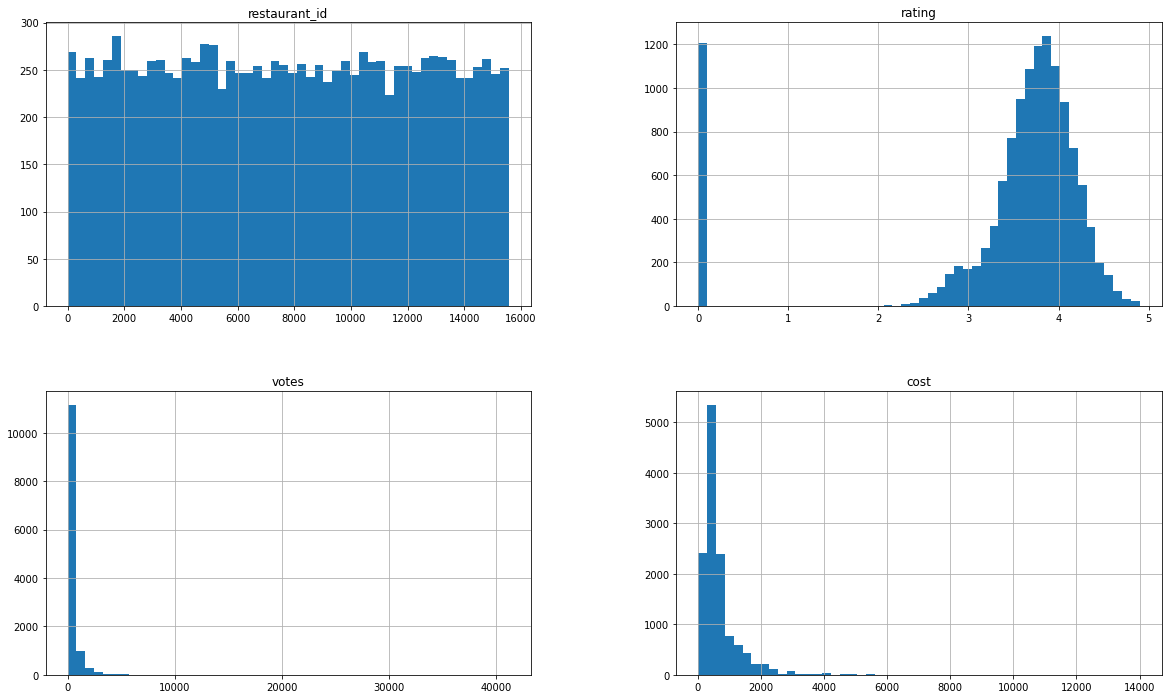

In [150]:
train_df.hist(figsize=(20,12), bins=50)
plt.show()

Observations:
1. Rating shows some outliers.
2. Votes and cost are right skewed.

### Univariant and Bivariant Analysis

In [ ]:
def plot(data_frame, col, target, count=True, sort = False, records = 10):
  if count:
    if data_frame[col].nunique() > 10:
      plt.figure(figsize=(25,10))
    else:
      plt.figure(figsize=(15,8))
    sns.countplot(x=col,data=data_frame)
    plt.show()
    
    print(f"\n{col}-Value Counts")
    print("Top 5")
    print(data_frame[col].value_counts().head())
    print("-"*50)
    print("Bottom 5")
    print(data_frame[col].value_counts().tail())
    print("="*50+"\n")
  
  if sort:
    
    pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False).head(records).plot.bar(figsize=(20,5))
    plt.title(f"Showing Top few average {target} for {col}")
    plt.show()
    print(f"\n{pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False).head(records)}\n\n")
    
    pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False).tail(records).plot.bar(figsize=(20,5))
    plt.title(f"Showing Bottom few average {target} for {col}")
    plt.show()
    print(f"\n{pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False).tail(records)}\n\n")
  else:
    pd.pivot_table(data_frame, index=[col], values= [target]).plot.bar(figsize=(20,5))
    plt.title(f"Showing average {target} for {col}")
    plt.show()
    print(f"\n{pd.pivot_table(data_frame, index=[col], values= [target]).sort_values(by=target, ascending=False)}\n\n")


#### Cost analysis on Cuisines

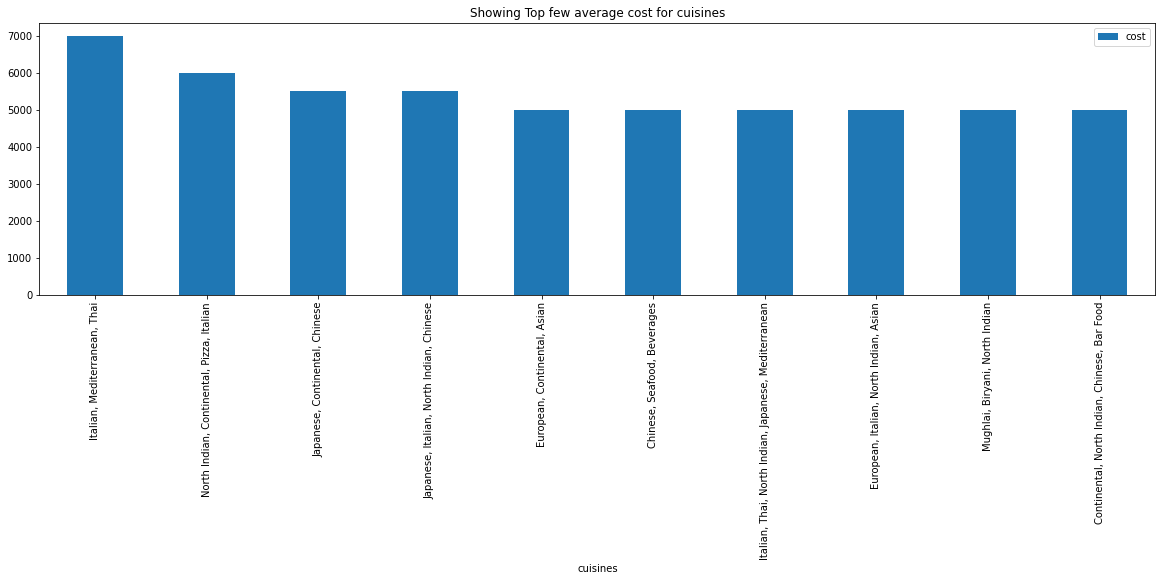


                                                      cost
cuisines                                                  
Italian, Mediterranean, Thai                        7000.0
North Indian, Continental, Pizza, Italian           6000.0
Japanese, Continental, Chinese                      5500.0
Japanese, Italian, North Indian, Chinese            5500.0
European, Continental, Asian                        5000.0
Chinese, Seafood, Beverages                         5000.0
Italian, Thai, North Indian, Japanese, Mediterr...  5000.0
European, Italian, North Indian, Asian              5000.0
Mughlai, Biryani, North Indian                      5000.0
Continental, North Indian, Chinese, Bar Food        5000.0




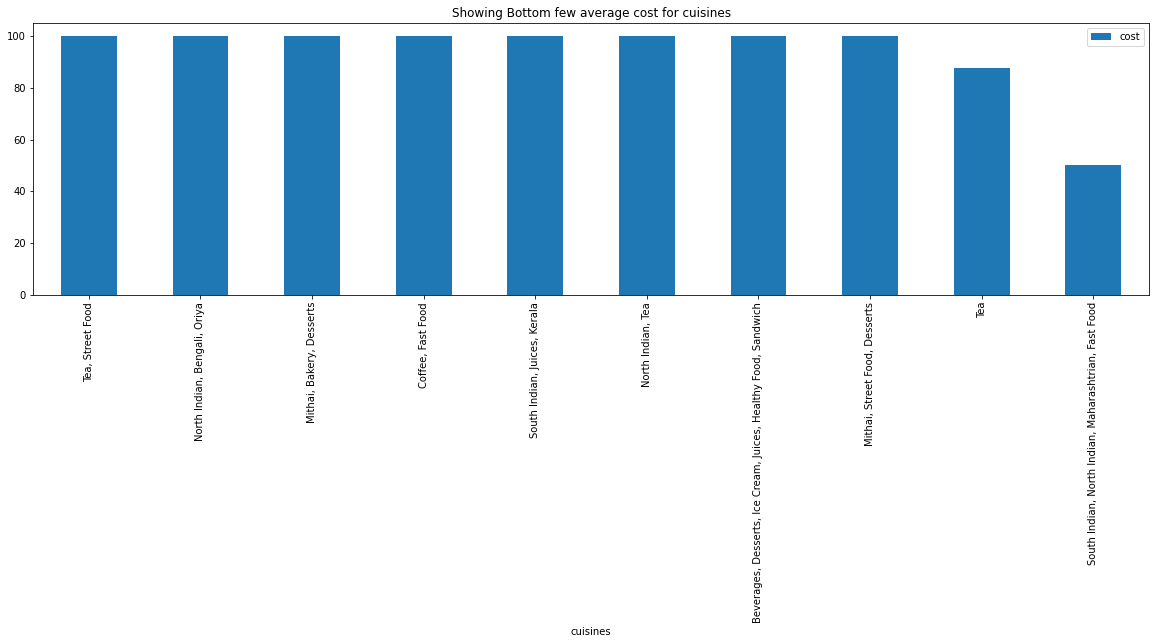


                                                     cost
cuisines                                                 
Tea, Street Food                                    100.0
North Indian, Bengali, Oriya                        100.0
Mithai, Bakery, Desserts                            100.0
Coffee, Fast Food                                   100.0
South Indian, Juices, Kerala                        100.0
North Indian, Tea                                   100.0
Beverages, Desserts, Ice Cream, Juices, Healthy...  100.0
Mithai, Street Food, Desserts                       100.0
Tea                                                  87.5
South Indian, North Indian, Maharashtrian, Fast...   50.0




In [ ]:
plot(train_df, 'cuisines','cost', count=False, sort=True)

Observations:
1. Italian, Mediterranean, Thai combo Cuisines have the highest average cost followed by North Indian, Continental, Pizza, Italian combo.
2. Restaurants with a combination of South Indian, North Indian, Maharashtrian, Fast food etc have the lowest Average cost.

#### Analysing city and Cost Analysis based on Cities

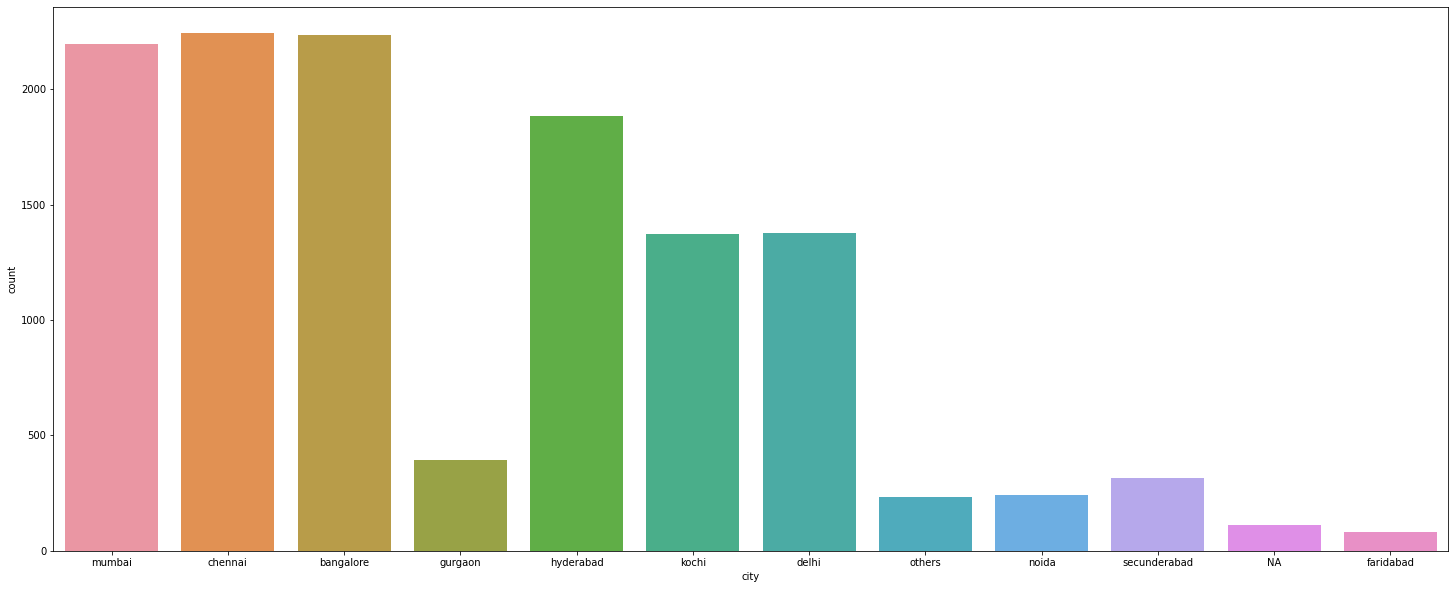


city-Value Counts
Top 5
chennai      2244
bangalore    2235
mumbai       2196
hyderabad    1886
delhi        1378
Name: city, dtype: int64
--------------------------------------------------
Bottom 5
secunderabad    314
noida           242
others          235
NA              112
faridabad        80
Name: city, dtype: int64



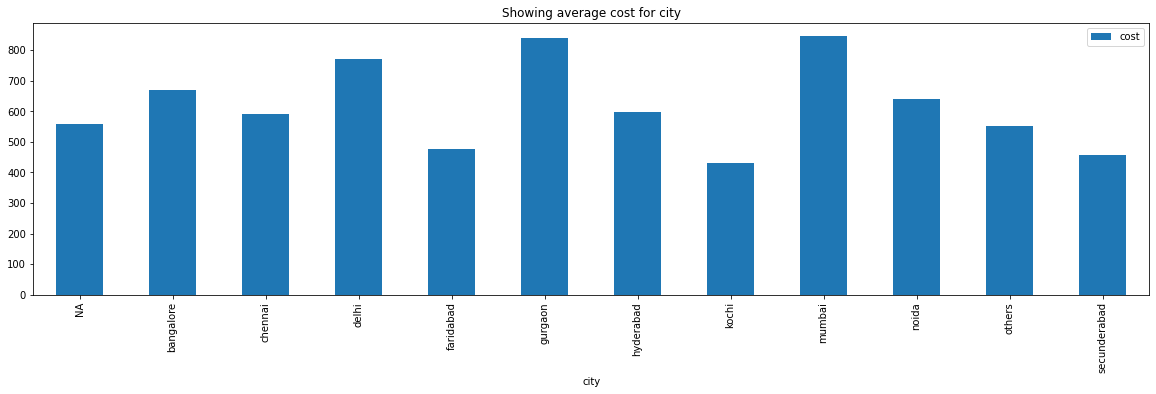


                    cost
city                    
mumbai        846.402550
gurgaon       838.705584
delhi         771.386067
bangalore     667.923490
noida         640.495868
hyderabad     596.330859
chennai       590.860071
NA            558.035714
others        552.765957
faridabad     475.875000
secunderabad  456.847134
kochi         429.935953




In [ ]:
plot(train_df, 'city', 'cost')

Observations:
1. The most frequent city is chennai followed by bangalore and the least frequent city is faridabad.
2. Mumbai seem to have the highest average cost followed by gurgaon. The least average cost is in Kochi.

#### Cost analysis based on Locality

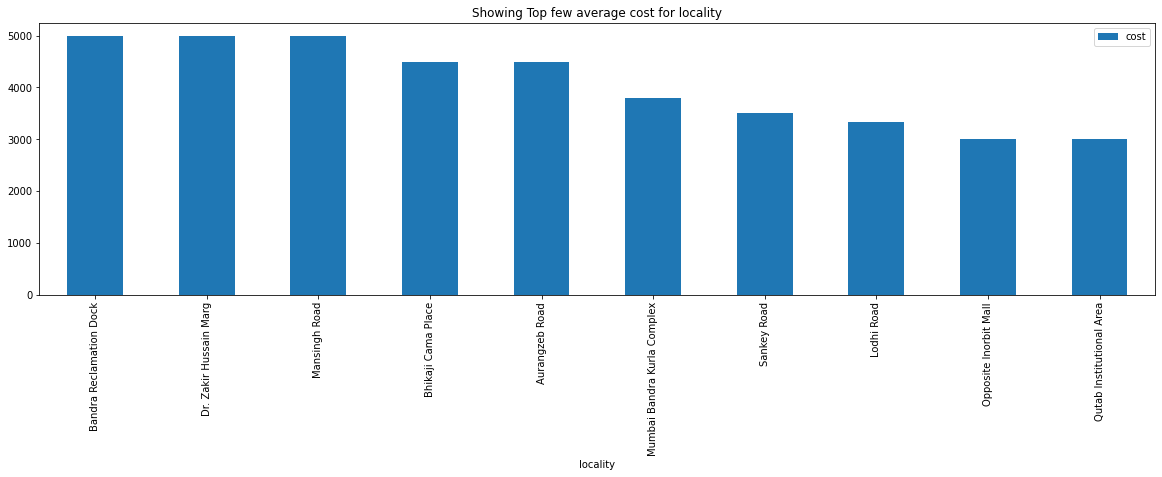


                                    cost
locality                                
Bandra Reclamation Dock      5000.000000
Dr. Zakir Hussain Marg       5000.000000
Mansingh Road                5000.000000
Bhikaji Cama Place           4500.000000
Aurangzeb Road               4500.000000
Mumbai Bandra Kurla Complex  3800.000000
Sankey Road                  3500.000000
Lodhi Road                   3333.333333
Opposite Inorbit Mall        3000.000000
Qutab Institutional Area     3000.000000




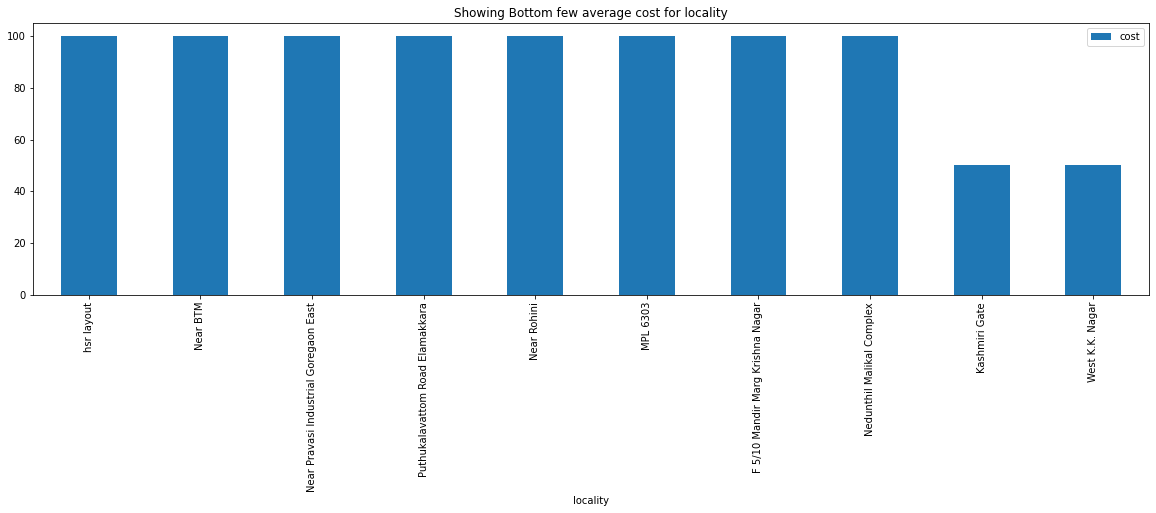


                                        cost
locality                                    
hsr layout                             100.0
Near BTM                               100.0
Near Pravasi Industrial Goregaon East  100.0
Puthukalavattom Road Elamakkara        100.0
Near Rohini                            100.0
MPL 6303                               100.0
F 5/10 Mandir Marg Krishna Nagar       100.0
Nedunthil Malikal Complex              100.0
Kashmiri Gate                           50.0
West K.K. Nagar                         50.0




In [ ]:
plot(train_df, 'locality', 'cost',count=False, sort = True, records= 10)

Observations:
1. Localities are very specific to the cities. The most expensive restaurants are in Bandra Reclamation dock, DR. Zarik Hussain Marg and Mansingh Road.
2. The least expensive restaurants are in Kashmiri Gate and West K.K. Nagar.

#### Cost analysis based on rating

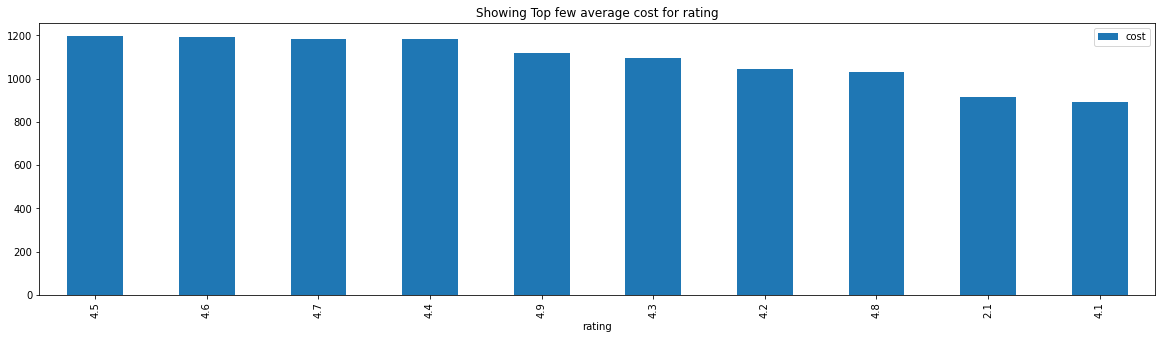


               cost
rating             
4.5     1197.738693
4.6     1193.617021
4.7     1184.782609
4.4     1183.066298
4.9     1120.454545
4.3     1096.780576
4.2     1043.983402
4.8     1032.812500
2.1      916.666667
4.1      890.117521




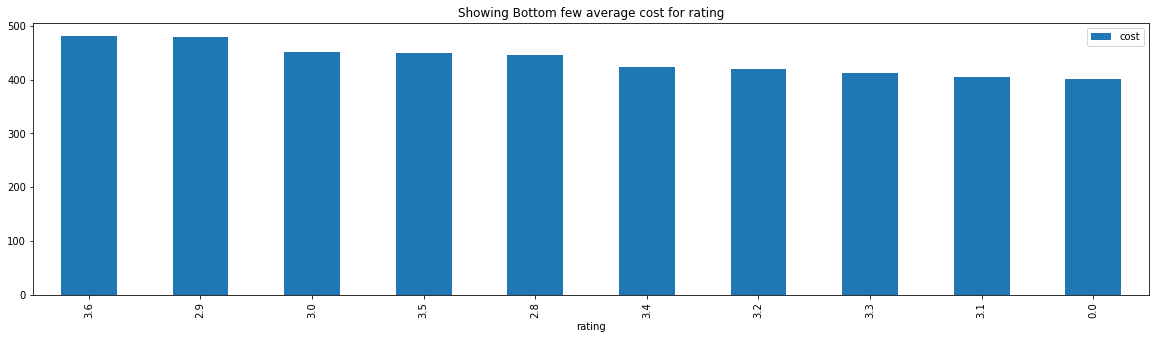


              cost
rating            
3.6     481.093586
2.9     478.817204
3.0     450.588235
3.5     449.909209
2.8     446.506849
3.4     423.513043
3.2     419.169173
3.3     411.816438
3.1     405.483871
0.0     401.071429




In [ ]:
plot(train_df, 'rating', 'cost',count=False, sort = True)

Observations:
1. Restaurants with ratings greater than 4.2 seem to be costlier.
2. Some of the cheaper restaurants have ratings between 2.8 to 3.6 and also no ratings indicated by 0.

#### Cost analysis based on votes.

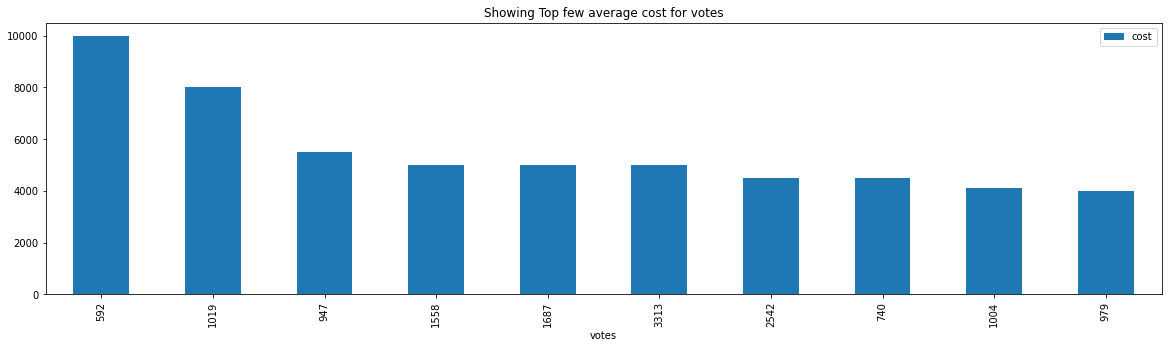


          cost
votes         
592    10000.0
1019    8000.0
947     5500.0
1558    5000.0
1687    5000.0
3313    5000.0
2542    4500.0
740     4500.0
1004    4100.0
979     4000.0




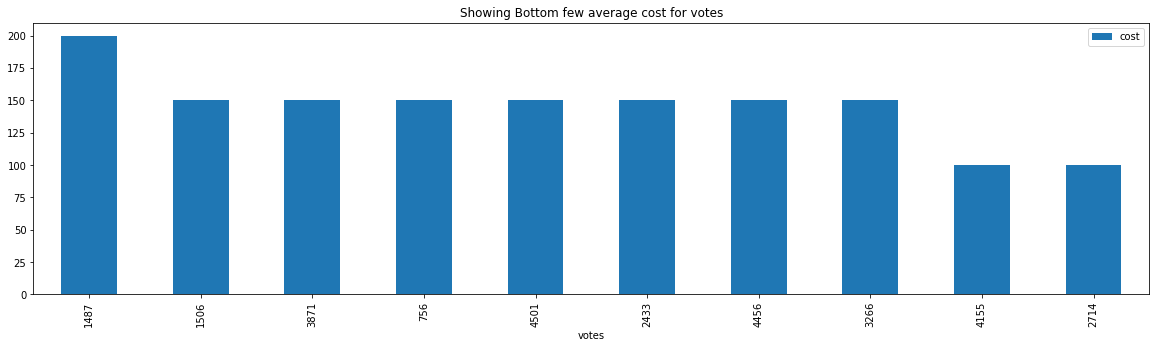


        cost
votes       
1487   200.0
1506   150.0
3871   150.0
756    150.0
4501   150.0
2433   150.0
4456   150.0
3266   150.0
4155   100.0
2714   100.0




In [ ]:
plot(train_df, 'votes', 'cost',count=False, sort = True)

Observations:
1. Number of votes seem to be distributed across the different average costs without any specific pattern.


### Multivariant analysis

#### cost based on Top 5 titles in all the cities

In [ ]:
train_df['title'].value_counts().head(5)

Index(['QUICK BITES', 'CASUAL DINING', 'None', 'CAFÉ', 'DESSERT PARLOR'], dtype='object')

In [ ]:
top_five_titles=train_df[train_df['title'].isin(train_df['title'].value_counts().head(5).index)]

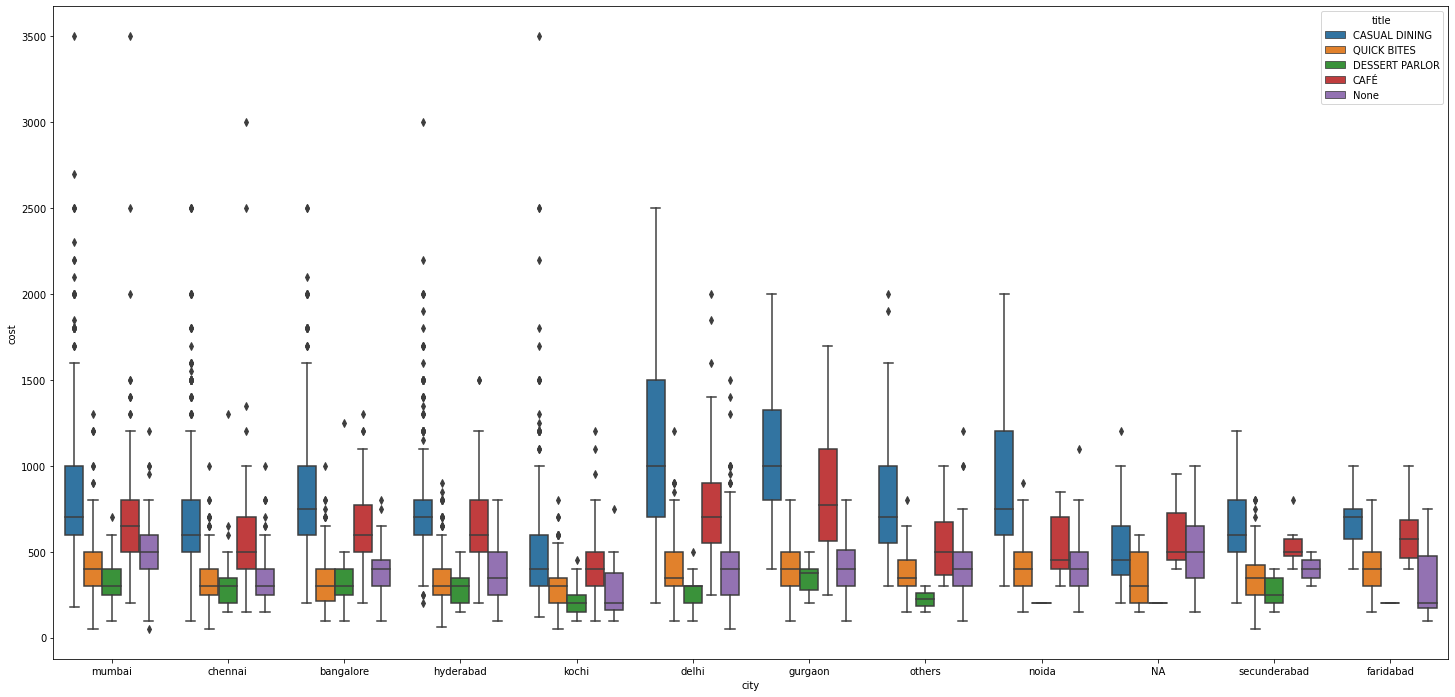

In [ ]:
plt.figure(figsize=(25,12))
sns.boxplot(x='city', y='cost', data= top_five_titles, hue='title')
plt.show()

Observations:
1. The graph shows the top 5 restaurant types with respect to average cost.
2. Casual Dining restaurants seem to be generally costly in all cities.
3. Kochi seem to have the lowest average cost amonst the cities for the top 5 restaurant types although there are some outliers.
4. Dessert Parlours seem to have very close range of costs in all the cities.
5. All the cities other than Faridabad seem to have some outliers on the upper end.

#### Cost Analysis based on bottom 3 Titles.

In [ ]:
train_df['title'].value_counts()[train_df['title'].value_counts()>50].tail(5)

FOOD COURT               78
CASUAL DINING,CAFÉ       56
KIOSK                    53
MESS                     53
BAKERY,DESSERT PARLOR    51
Name: title, dtype: int64

In [ ]:
bottom_five_titles=train_df[train_df['title'].isin(train_df['title'].value_counts()[train_df['title'].value_counts()>50].tail(5).index)]

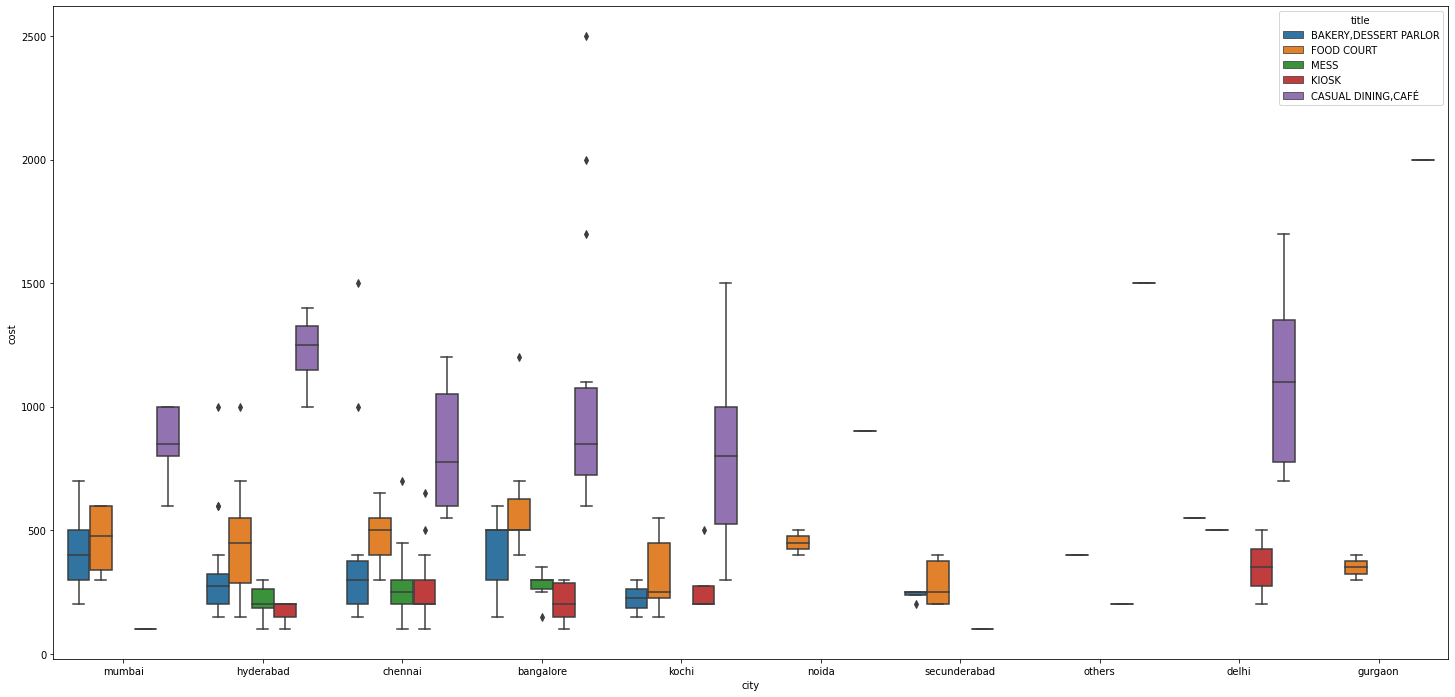

In [ ]:
plt.figure(figsize=(25,12))
sns.boxplot(x='city', y='cost', data= bottom_five_titles, hue='title')
plt.show()

Observations:
1. Bakery, dessert Parlour seem to have the lowest average cost across the cities.
2. Casual Dining, Cafe seem to have a variety of ranges in cost across the cities. Bangalore have some large outliers in Casual Dining, Cafe.

#### Cost Analysis based on top 5 Cuisines

In [ ]:
train_df['cuisines'].value_counts().head(5)

Index(['South Indian', 'North Indian', 'North Indian, Chinese', 'Fast Food',
       'Chinese'],
      dtype='object')

In [ ]:
top_five_cuisines=train_df[train_df['cuisines'].isin(train_df['cuisines'].value_counts().head(5).index)]

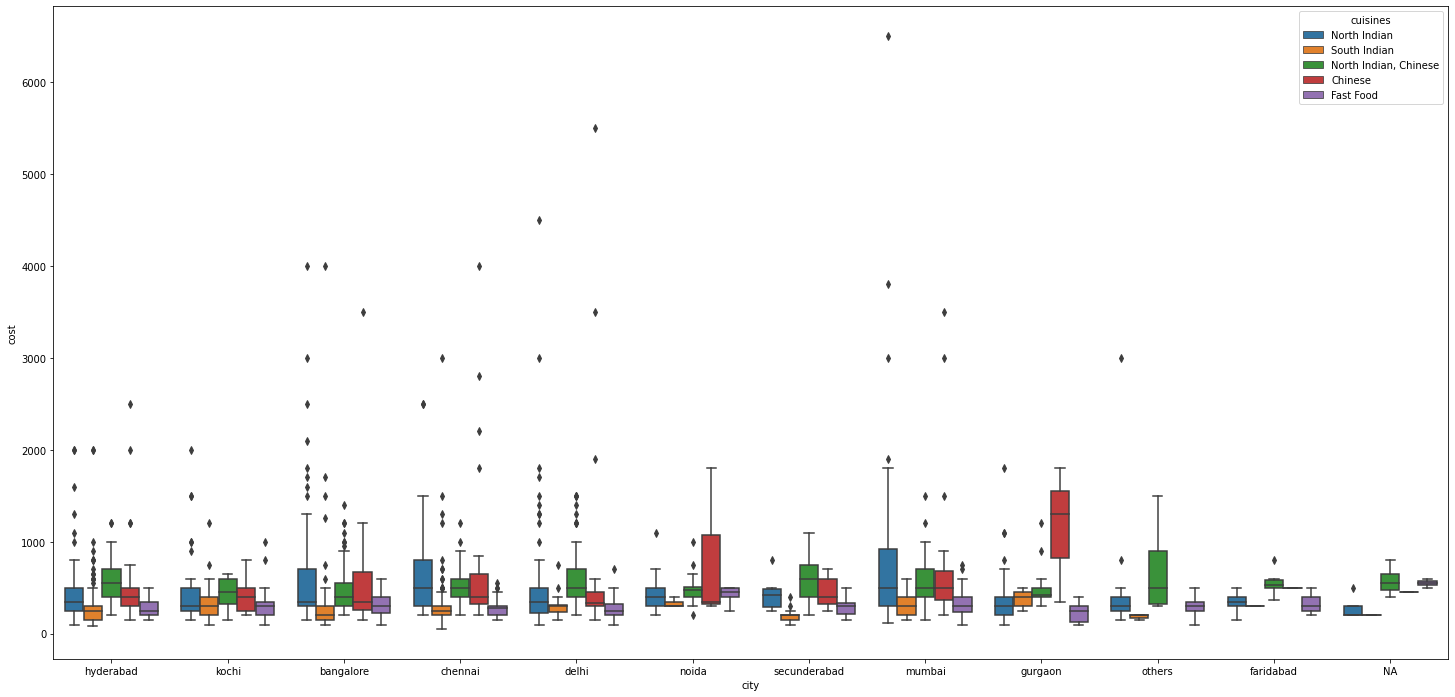

In [ ]:
plt.figure(figsize=(25,12))
sns.boxplot(x='city', y='cost', data= top_five_cuisines, hue='cuisines')
plt.show()

Observations:
1. Chinese Food seem to be costlier in Gurgaon and Noida.
2. Fast foods are less costlier in Gurgaon than the other cities.

##### Bottom 5 cuisines

In [ ]:
train_df['cuisines'].value_counts()[train_df['cuisines'].value_counts()>50].tail(5)

Pizza                    55
Kerala, South Indian     54
Chinese, Momos           54
North Indian, Biryani    53
South Indian, Chinese    52
Name: cuisines, dtype: int64

In [ ]:
bottom_five_cuisines=train_df[train_df['cuisines'].isin(train_df['cuisines'].value_counts()[train_df['cuisines'].value_counts()>50].tail(5).index)]

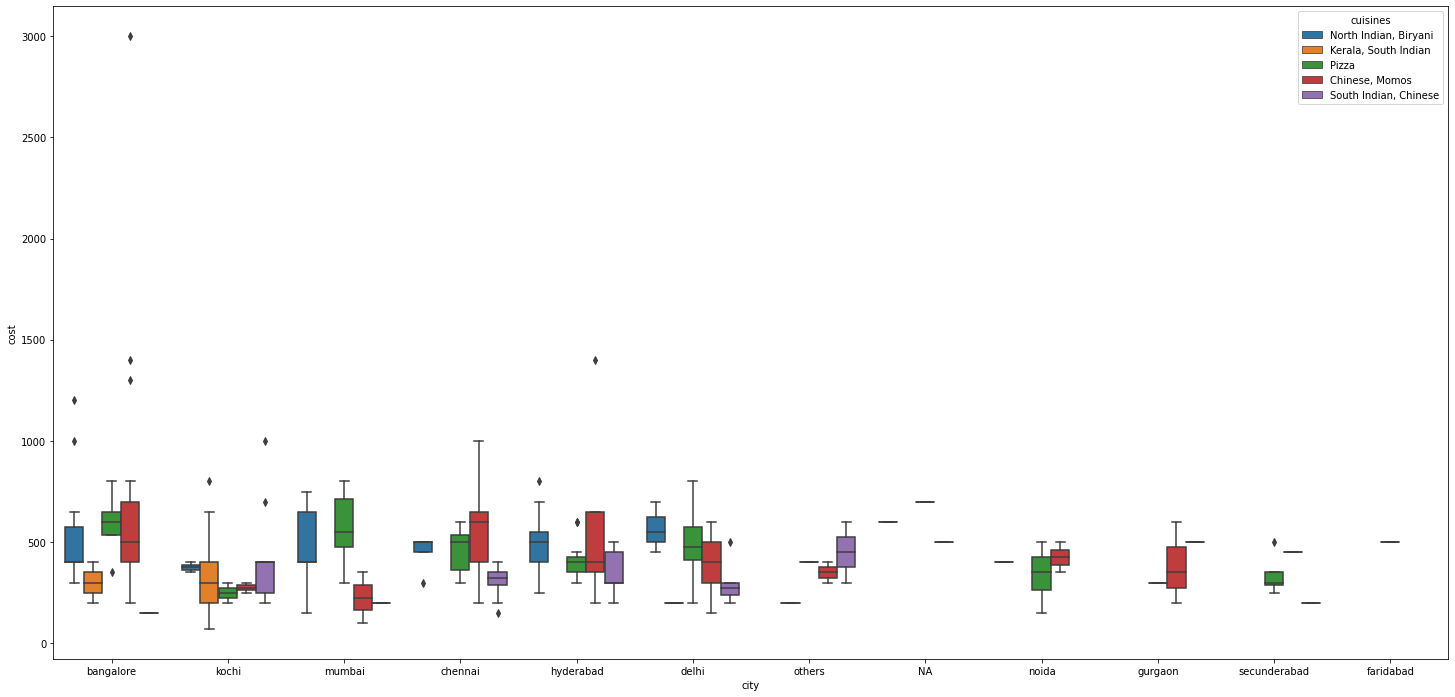

In [ ]:
plt.figure(figsize=(25,12))
sns.boxplot(x='city', y='cost', data= bottom_five_cuisines, hue='cuisines')
plt.show()

Observations:
1. South Indian and Chinese combination seem to cost the lowest.
2. The lowest cost in the dataset seem to be for Kerla, South Indian cuisines in Kechi.
3. Chinese, Momos cost is lowest in Mumbai.
4. Chinese Momos has a wide range of cost in Chennai.

#### cost with respect to city and rating.

##### Rating below 2

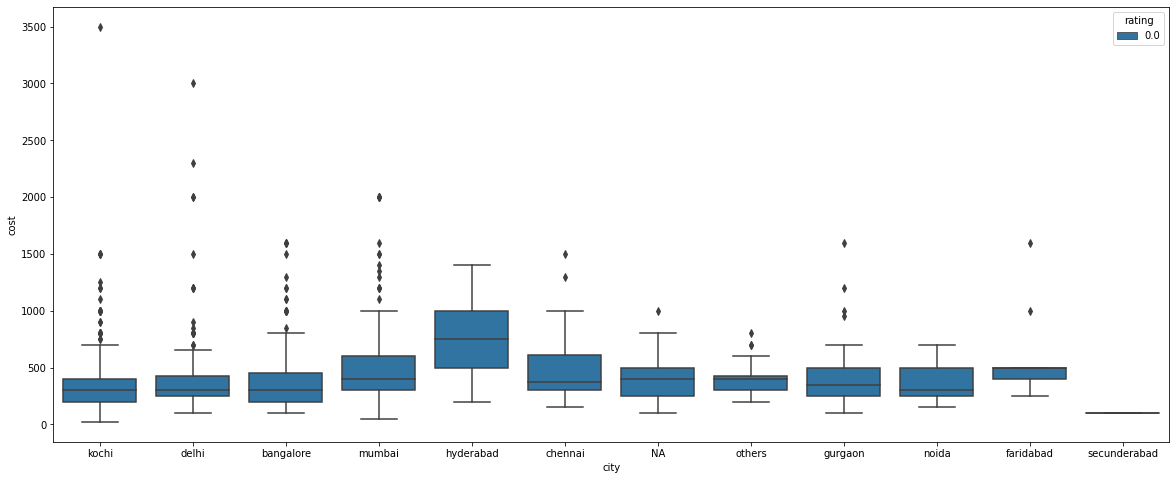

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='city', y='cost', data= train_df[train_df['rating']<2], hue='rating')
plt.show()

Observations:
1. Only 0 rating is available in the train set below 2.
2. The highest average cost for rating 0 is in Hyderabad and the lowest is in Secunderabad.
3. The highest individual cost for rating 0 is in Kochi.

##### Rating from 2 to 3

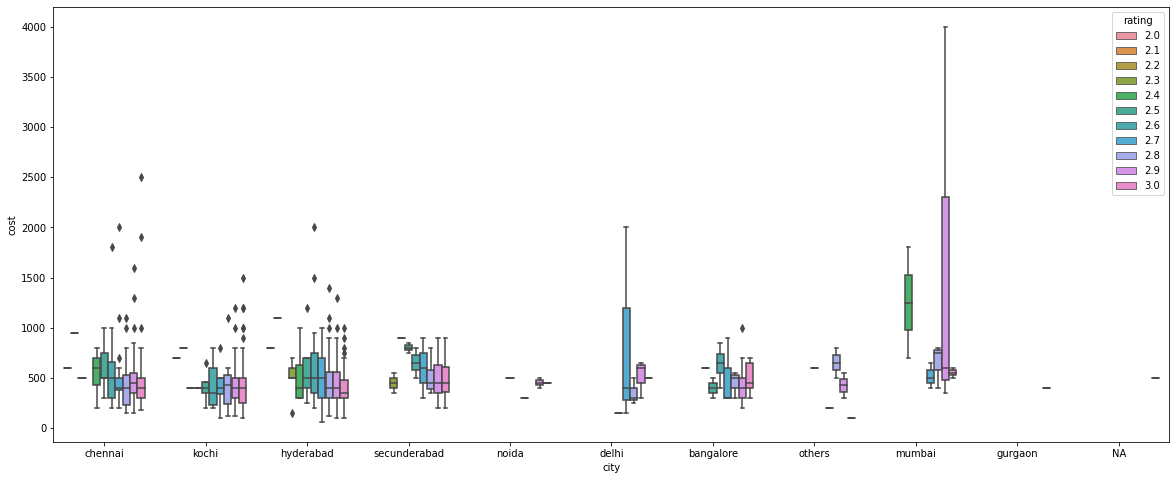

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='city', y='cost', data= train_df[(train_df['rating']>1.9)&(train_df['rating']<3.1)], hue='rating')
plt.show()

Observations:
1. Most of the ratings in Mumbai is 2.9 and the cost is also high for those restaurants in Mumbai.
2. Chennai and Hyderabad have records with a mix of ratings in between 2 to 3 than in other states.

##### Rating between 3 and 3.5

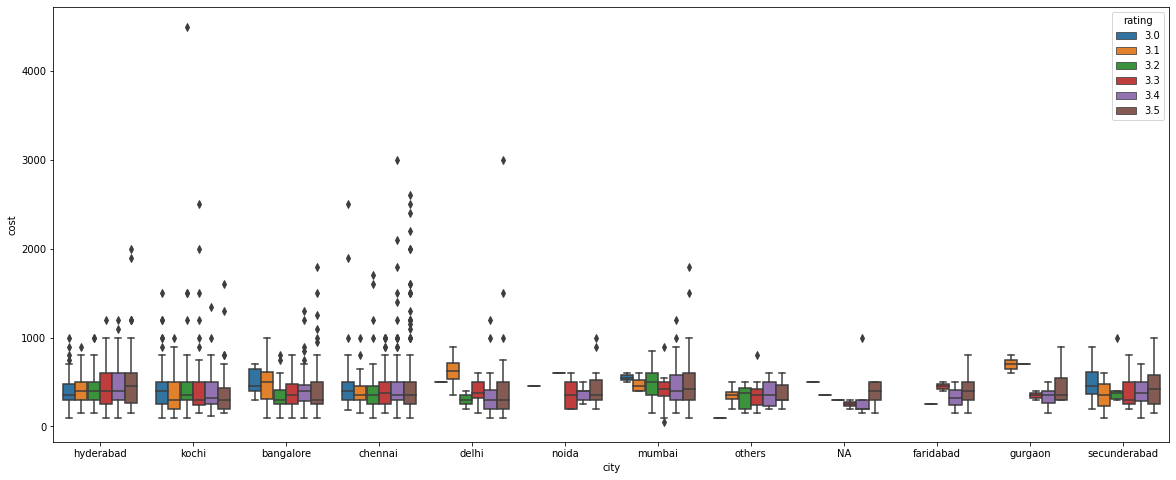

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot(x='city', y='cost', data= train_df[(train_df['rating']>2.9)&(train_df['rating']<3.6)], hue='rating')
plt.show()

Observations:
1. The average cost of all restaurants with rating between 3 an 3.5 seem to be close to 500.
2. Kochi has a very costly restaurant with a rating of 3.2.

##### Rating above 4

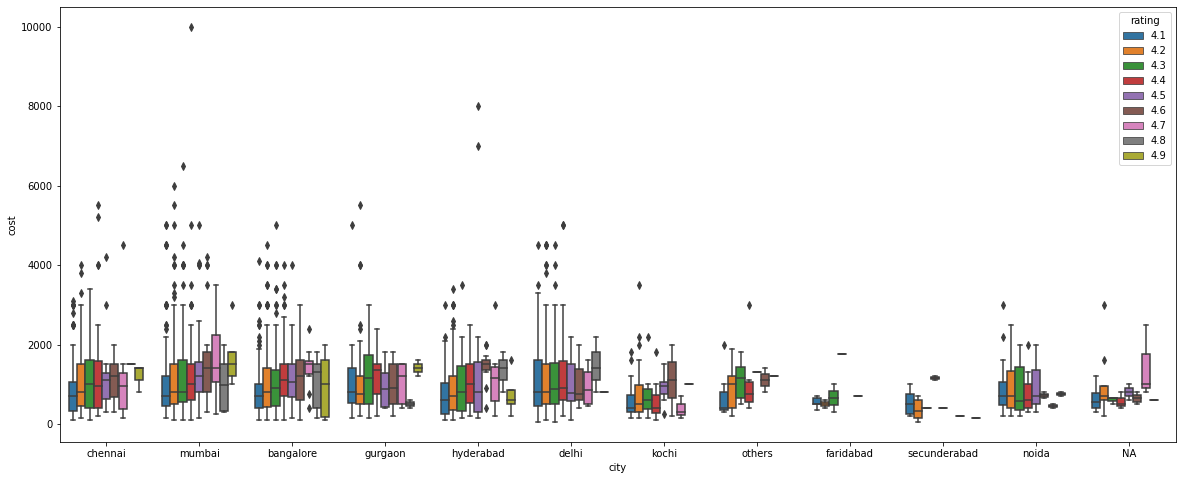

In [152]:
plt.figure(figsize=(20,8))
sns.boxplot(x='city', y='cost', data= train_df[train_df['rating']>4], hue='rating')
plt.show()

Observations:
1. The average cost of all restaurants having rating above 4 is pretty close to 1000.
2. There is a very costly restarant in Mumbai with a rating of 4.4.

#### Rating vs cost

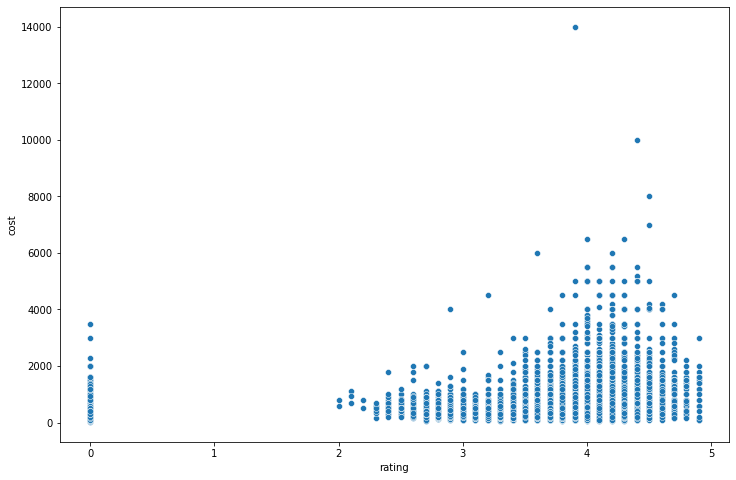

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='rating', y='cost', data = train_df)

plt.show()

Observations:
1. Eve though there is no clear linear relationship, We can see an increase in cost as the rating increases.

#### Votes vs cost

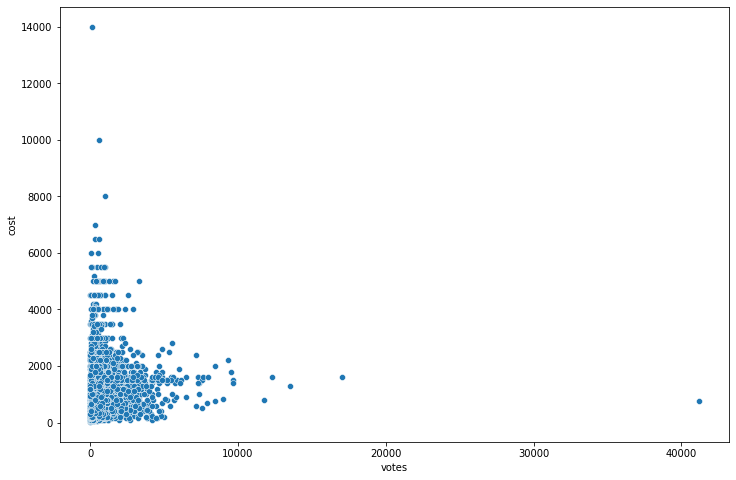

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='votes', y='cost', data = train_df)
plt.show()

Observations:
1. The lesser number of votes have the larger price tags.

## Data Encoding

Intuition:
1. City variable can be one hot encoded.
2. Since there is very high cardinality in the other features, One Hot encoding may not be suitable for us because new features will be added to the dataset based on the number of categories.
2. It is not a good idea to do label encoding or any ordinal encoding because the categories in our categorical features are not oridinal. They are only nominal. By doing oridinal encoding the algorithm would give more weightage to larger numbers than smaller numbers.
3. The best option at this point would be to do Hashing encoding.

In [155]:
df_tr_new.head()

,restaurant_id,city,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8
0,9438,mumbai,Dombivali East,3.6,49,1200,CASUAL DINING,NA,Malwani,Goan,North Indian,NA,NA,NA,NA,NA
1,13198,chennai,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NA,NA,NA,NA,NA
2,10915,chennai,Saligramam,3.8,221,800,CASUAL DINING,NA,North Indian,Chinese,Biryani,Hyderabadi,NA,NA,NA,NA
3,6346,mumbai,Bandra West,4.1,24,800,QUICK BITES,NA,Tibetan,Chinese,NA,NA,NA,NA,NA,NA
4,15387,mumbai,Lower Parel,3.8,165,300,DESSERT PARLOR,NA,Desserts,NA,NA,NA,NA,NA,NA,NA


In [156]:
features = ['city', 'locality','rest_type1', 'rest_type2', 'cuis_type1', 'cuis_type2', 'cuis_type3',
       'cuis_type4', 'cuis_type5', 'cuis_type6', 'cuis_type7', 'cuis_type8']
for feature in features:
  print(f"Train set - Number of unique values in {feature} is {df_tr_new[feature].nunique()}.")
  print(f"Test set - Number of unique values in {feature} is {df_ts_new[feature].nunique()}.")
  print('='*55+"\n")

Train set - Number of unique values in city is 12.
Test set - Number of unique values in city is 12.

Train set - Number of unique values in locality is 1417.
Test set - Number of unique values in locality is 835.

Train set - Number of unique values in rest_type1 is 23.
Test set - Number of unique values in rest_type1 is 24.

Train set - Number of unique values in rest_type2 is 20.
Test set - Number of unique values in rest_type2 is 17.

Train set - Number of unique values in cuis_type1 is 104.
Test set - Number of unique values in cuis_type1 is 83.

Train set - Number of unique values in cuis_type2 is 99.
Test set - Number of unique values in cuis_type2 is 82.

Train set - Number of unique values in cuis_type3 is 94.
Test set - Number of unique values in cuis_type3 is 81.

Train set - Number of unique values in cuis_type4 is 86.
Test set - Number of unique values in cuis_type4 is 69.

Train set - Number of unique values in cuis_type5 is 79.
Test set - Number of unique values in cuis_

#### City

Train set

In [157]:
df_tr_new['city'].unique()

array(['mumbai', 'chennai', 'bangalore', 'gurgaon', 'hyderabad', 'kochi',
       'delhi', 'others', 'noida', 'secunderabad', 'NA', 'faridabad'],
      dtype=object)

Test set

In [158]:
df_ts_new['city'].unique()

array(['noida', 'mumbai', 'faridabad', 'kochi', 'hyderabad', 'chennai',
       'delhi', 'bangalore', 'gurgaon', 'others', 'secunderabad', 'NA'],
      dtype=object)

One Hot encoding the city variable in trainset

In [160]:
one_hot_city = OneHotEncoder(handle_unknown='ignore')
df_city = one_hot_city.fit_transform(df_tr_new[['city']])

city_enc_df = pd.DataFrame(df_city.toarray(), columns=["City_"+x for x in sorted(df_tr_new['city'].unique())]).astype('int')
df_tr_enc = pd.concat([df_tr_new.drop(['city'],axis=1),city_enc_df],axis=1)

verifying the train set

In [ ]:
df_tr_enc.head(2)

,restaurant_id,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8,City_NA,City_bangalore,City_chennai,City_delhi,City_faridabad,City_gurgaon,City_hyderabad,City_kochi,City_mumbai,City_noida,City_others,City_secunderabad
0,9438,Dombivali East,3.6,49,1200,CASUAL DINING,NA,Malwani,Goan,North Indian,NA,NA,NA,NA,NA,0,0,0,0,0,0,0,0,1,0,0,0
1,13198,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NA,NA,NA,NA,NA,0,0,1,0,0,0,0,0,0,0,0,0


One Hot encoding the city variable in testset with parameters learned from train set

In [161]:
df_city_ts = one_hot_city.transform(df_ts_new[['city']])

city_encts_df = pd.DataFrame(df_city_ts.toarray(), columns=["City_"+x for x in sorted(df_tr_new['city'].unique())]).astype('int')
df_ts_enc = pd.concat([df_ts_new.drop(['city'],axis=1),city_encts_df],axis=1)

verifying the test set

In [162]:
df_ts_enc.head(2)

,restaurant_id,locality,rating,votes,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8,City_NA,City_bangalore,City_chennai,City_delhi,City_faridabad,City_gurgaon,City_hyderabad,City_kochi,City_mumbai,City_noida,City_others,City_secunderabad
0,4085,Sector 18,3.6,564,CASUAL DINING,NA,North Indian,Chinese,Mughlai,Kebab,NA,NA,NA,NA,0,0,0,0,0,0,0,0,0,1,0,0
1,12680,Grant Road,4.2,61,QUICK BITES,NA,South Indian,Fast Food,Pizza,North Indian,NA,NA,NA,NA,0,0,0,0,0,0,0,0,1,0,0,0


##### HashingEncoding the high cardinality features.

1. The features 'locality','rest_type1', 'rest_type2', 'cuis_type1', 'cuis_type2', 'cuis_type3','cuis_type4', 'cuis_type5', 'cuis_type6', 'cuis_type7' and 'cuis_type8' have too many categories. 
2. Itwould be a bad idea to use label encoding or ordinal encoding for these features as these are not ordinal variables. These are nominal variables and setting each category with a number wil force the model to think that the category with larger number has a higher rank than the category with a smaller number.
3. Since these features have high cardinality, it is better to use Hashing Encoders instead fo OneHotEncoding. Because using Hashing Encoder we can control the number of new features.

In [165]:
df_tr_enc.head()

,restaurant_id,locality,rating,votes,cost,rest_type1,rest_type2,cuis_type1,cuis_type2,cuis_type3,cuis_type4,cuis_type5,cuis_type6,cuis_type7,cuis_type8,City_NA,City_bangalore,City_chennai,City_delhi,City_faridabad,City_gurgaon,City_hyderabad,City_kochi,City_mumbai,City_noida,City_others,City_secunderabad
0,9438,Dombivali East,3.6,49,1200,CASUAL DINING,NA,Malwani,Goan,North Indian,NA,NA,NA,NA,NA,0,0,0,0,0,0,0,0,1,0,0,0
1,13198,Ramapuram,4.2,30,1500,CASUAL DINING,BAR,Asian,Modern Indian,Japanese,NA,NA,NA,NA,NA,0,0,1,0,0,0,0,0,0,0,0,0
2,10915,Saligramam,3.8,221,800,CASUAL DINING,NA,North Indian,Chinese,Biryani,Hyderabadi,NA,NA,NA,NA,0,0,1,0,0,0,0,0,0,0,0,0
3,6346,Bandra West,4.1,24,800,QUICK BITES,NA,Tibetan,Chinese,NA,NA,NA,NA,NA,NA,0,0,0,0,0,0,0,0,1,0,0,0
4,15387,Lower Parel,3.8,165,300,DESSERT PARLOR,NA,Desserts,NA,NA,NA,NA,NA,NA,NA,0,0,0,0,0,0,0,0,1,0,0,0


In [166]:
features = ['locality','rest_type1', 'rest_type2', 'cuis_type1', 'cuis_type2', 'cuis_type3',
       'cuis_type4', 'cuis_type5', 'cuis_type6', 'cuis_type7', 'cuis_type8']
for feature in features:
  print(f"Train set - Number of unique values in {feature} is {df_tr_enc[feature].nunique()}.")
  print(f"Test set - Number of unique values in {feature} is {df_ts_enc[feature].nunique()}.")
  print('='*55+"\n")

Train set - Number of unique values in locality is 1417.
Test set - Number of unique values in locality is 835.

Train set - Number of unique values in rest_type1 is 23.
Test set - Number of unique values in rest_type1 is 24.

Train set - Number of unique values in rest_type2 is 20.
Test set - Number of unique values in rest_type2 is 17.

Train set - Number of unique values in cuis_type1 is 104.
Test set - Number of unique values in cuis_type1 is 83.

Train set - Number of unique values in cuis_type2 is 99.
Test set - Number of unique values in cuis_type2 is 82.

Train set - Number of unique values in cuis_type3 is 94.
Test set - Number of unique values in cuis_type3 is 81.

Train set - Number of unique values in cuis_type4 is 86.
Test set - Number of unique values in cuis_type4 is 69.

Train set - Number of unique values in cuis_type5 is 79.
Test set - Number of unique values in cuis_type5 is 58.

Train set - Number of unique values in cuis_type6 is 69.
Test set - Number of unique val

#### Choosing the number of components to get from encoding

In [168]:
lr = LinearRegression()

In [169]:
def get_errors(estimator, x, y, x_val, y_val):
  estimator.fit(x, y)
  y_pred = estimator.predict(x_val)
  errors = np.sqrt(mean_squared_error(y_val, y_pred))
  return errors

In [171]:
#Train set
x = df_tr_enc.drop(['cost'], axis=1)
y = df_tr_enc['cost']

#Test set
test_data = df_ts_enc

In [174]:
n_components_list = [i for i in range(200, 300, 8)]
#n_components_list = [i for i in range(32, 2000, 80)]
n_components_list_str = [str(i) for i in n_components_list]

In [ ]:
x_tr, x_ts, y_tr, y_ts = train_test_split(x,y,test_size=30, random_state=0)
columns= ['locality','rest_type1','rest_type2', 'cuis_type1', 'cuis_type2', 'cuis_type3', 'cuis_type4','cuis_type5', 'cuis_type6', 'cuis_type7', 'cuis_type8']
lr_errors = []

for n_components in n_components_list:
    
    hashing_enc = HashingEncoder(cols=columns, n_components=n_components).fit(x_tr, y_tr)
    
    X_train_hashing = hashing_enc.transform(x_tr.reset_index(drop=True))
    X_val_hashing = hashing_enc.transform(x_ts.reset_index(drop=True))
    
    lr_error = get_errors(lr, X_train_hashing, y_tr, X_val_hashing, y_ts)
    lr_errors.append(lr_error)

print(f"The lowest RMSE in Linear Regression is {min(lr_errors)} for n_components of {n_components_list[lr_errors.index(min(lr_errors))]}.")

The lowest RMSE in Linear Regression is 295.8373171671202 for n_components of 272.


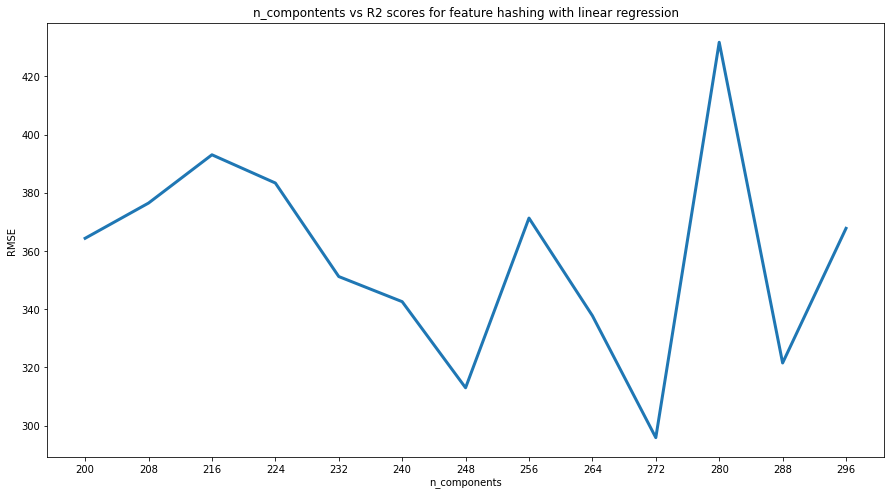

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(n_components_list_str, lr_errors, linewidth=3)
plt.title('n_compontents vs R2 scores for feature hashing with linear regression')
plt.xlabel('n_components')
plt.ylabel('RMSE')
plt.show()


In [ ]:
print(f"The lowest RMSE in Linear Regression is {min(lr_errors)} for n_components of {n_components_list[lr_errors.index(min(lr_errors))]}.")

The lowest RMSE in Linear Regression is 295.8373171671202 for n_components of 272.


Hashing encoding with 272 components.

In [175]:
columns= ['locality','rest_type1','rest_type2', 'cuis_type1', 'cuis_type2', 'cuis_type3', 'cuis_type4','cuis_type5', 'cuis_type6', 'cuis_type7', 'cuis_type8']
hash_encode = HashingEncoder(cols=columns, n_components=272)
hash_encode.fit(x, y)

HashingEncoder(cols=['locality', 'rest_type1', 'rest_type2', 'cuis_type1',
                     'cuis_type2', 'cuis_type3', 'cuis_type4', 'cuis_type5',
                     'cuis_type6', 'cuis_type7', 'cuis_type8'],
               drop_invariant=False, hash_method='md5', max_process=1,
               max_sample=12690, n_components=272, return_df=True, verbose=0)

In [176]:
#Train set
x_enc = hash_encode.transform(x.reset_index(drop=True))

#Test set
test_data_enc = hash_encode.transform(test_data.reset_index(drop=True))

verifying train set

In [177]:
x_enc.head(2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_247,col_248,col_249,col_250,col_251,col_252,col_253,col_254,col_255,col_256,col_257,col_258,col_259,col_260,col_261,col_262,col_263,col_264,col_265,col_266,col_267,col_268,col_269,col_270,col_271,restaurant_id,rating,votes,City_NA,City_bangalore,City_chennai,City_delhi,City_faridabad,City_gurgaon,City_hyderabad,City_kochi,City_mumbai,City_noida,City_others,City_secunderabad
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9438,3.6,49,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13198,4.2,30,0,0,1,0,0,0,0,0,0,0,0,0


Verifying test set

In [179]:
test_data_enc.head(2)

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_247,col_248,col_249,col_250,col_251,col_252,col_253,col_254,col_255,col_256,col_257,col_258,col_259,col_260,col_261,col_262,col_263,col_264,col_265,col_266,col_267,col_268,col_269,col_270,col_271,restaurant_id,rating,votes,City_NA,City_bangalore,City_chennai,City_delhi,City_faridabad,City_gurgaon,City_hyderabad,City_kochi,City_mumbai,City_noida,City_others,City_secunderabad
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4085,3.6,564,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12680,4.2,61,0,0,0,0,0,0,0,0,1,0,0,0


Saving the preprocessed data

In [180]:
train_processed_data = pd.concat([x_enc,pd.DataFrame(y)], axis=1)
train_processed_data.to_csv('/content/train_processed_data.csv', sep=',',index=False)
test_data_enc.to_csv('/content/test_processed_data.csv', sep=',',index=False)

Loading the Preprocessed data

In [181]:
x_enc = pd.read_csv('/content/train_processed_data.csv')
test_data_enc = pd.read_csv('/content/test_processed_data.csv')

In [182]:
x_enc.isnull().sum().sum()

0

In [183]:
test_data_enc.isnull().sum().sum()

0

## Outliers

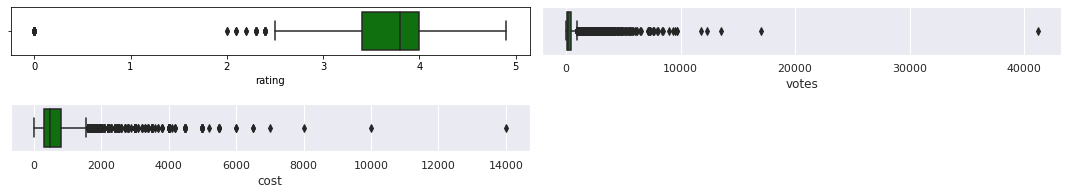

In [185]:
columns = ['rating','votes','cost']

plt.figure(figsize=(15, 40))
for i in range(0,len(columns)):
  plt.subplot(30,2,i+1)
  sns.set(font_scale = 1)
  sns.boxplot(x_enc[columns[i]], color='green')
  plt.tight_layout()


In [186]:
zf = np.abs(zscore(x_enc[['rating','votes','cost']]))
threshold = 3
train_df_no_out = x_enc[(zf < threshold).all(axis=1)]
print(f"{round((x_enc.shape[0] - train_df_no_out.shape[0])/ x_enc.shape[0]*100)}% data removed as outliers.")

3% data removed as outliers.


After removing outliers.

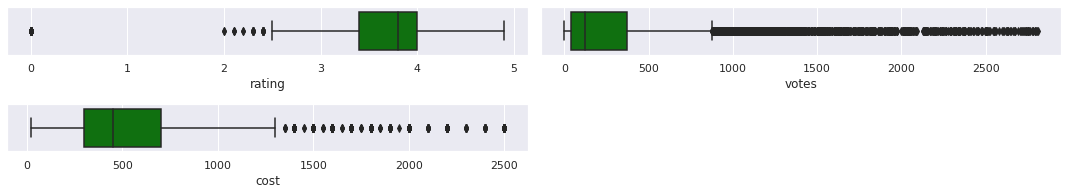

In [187]:
columns = ['rating','votes','cost']

plt.figure(figsize=(15, 40))
for i in range(0,len(columns)):
  plt.subplot(30,2,i+1)
  sns.set(font_scale = 1)
  sns.boxplot(train_df_no_out[columns[i]], color='green')
  plt.tight_layout()


In [188]:
train_df_no_out.isnull().sum().sum()

0

In [189]:
train_df_no_out.reset_index(drop=True, inplace=True)

test set

In [190]:
test_zf = np.abs(zscore(test_data_enc[['rating','votes']]))
threshold = 3
test_df_no_out = test_data_enc[(test_zf < threshold).all(axis=1)]
print(f"{round((test_data_enc.shape[0] - test_df_no_out.shape[0])/ test_data_enc.shape[0]*100)}% data removed as outliers.")

3% data removed as outliers.


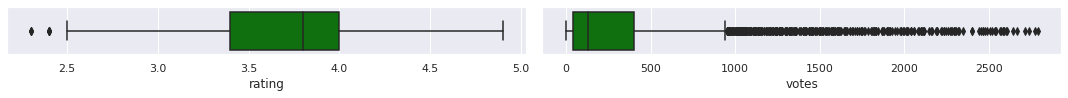

In [191]:
columns = ['rating','votes']

plt.figure(figsize=(15, 40))
for i in range(0,len(columns)):
  plt.subplot(30,2,i+1)
  sns.set(font_scale = 1)
  sns.boxplot(test_df_no_out[columns[i]], color='green')
  plt.tight_layout()


In [192]:
test_df_no_out.isnull().sum().mean()

0.0

In [193]:
test_df_no_out.reset_index(drop=True, inplace=True)

Observations:
1. The outliers may be natural outliers are may actually be useful. Hence I'll be experimenting with and without outliers to see the impact of the outliers.

## Correlation

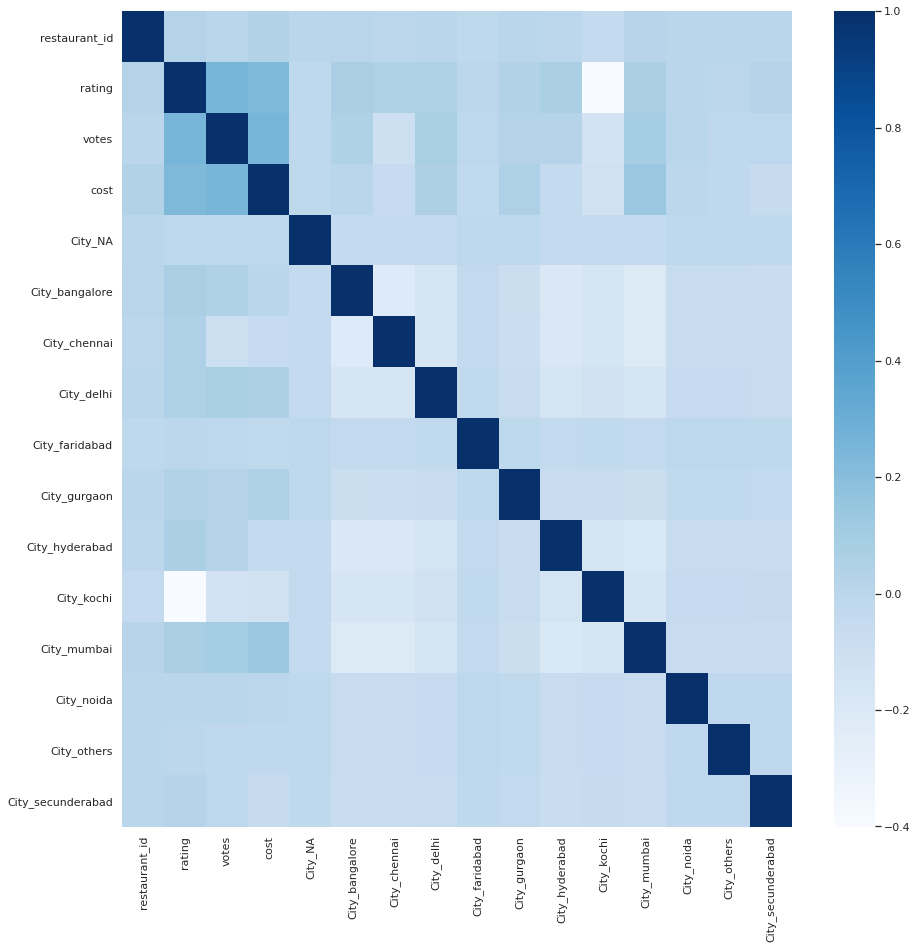

In [262]:
plt.figure(figsize=(15,15))
sns.heatmap(df_tr_enc.corr(),cmap='Blues')

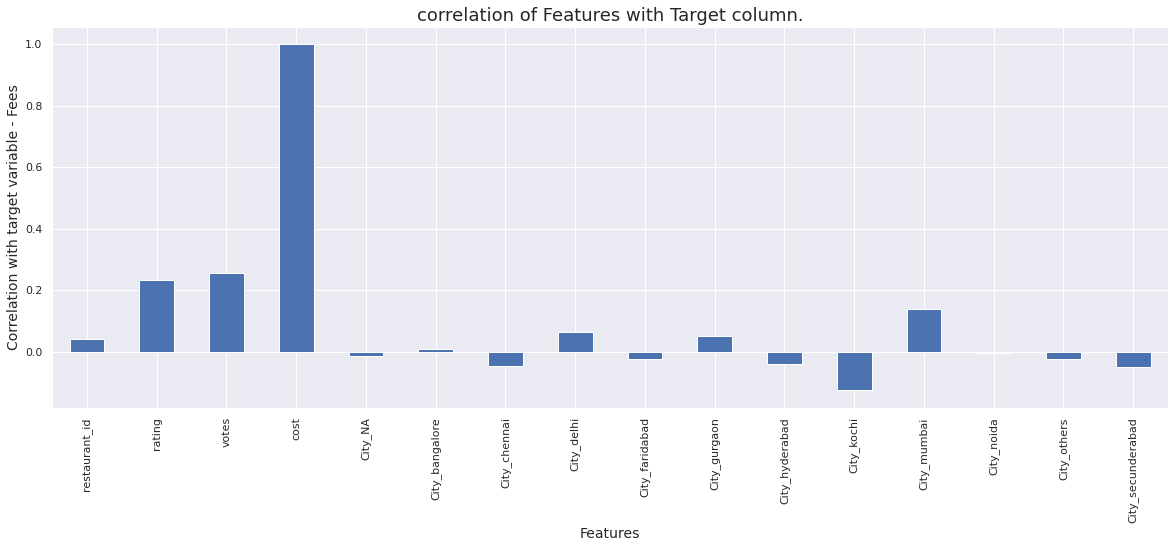

In [261]:
plt.figure(figsize=(20,7))
df_tr_enc.corr()['cost'].plot.bar()
plt.xlabel('Features', fontsize=14)
plt.ylabel('Correlation with target variable - Fees', fontsize=14)
plt.title("correlation of Features with Target column.", fontsize=18)
plt.show()

Observations:
1. The correlation between the traget variable and the Features are spread across. No signoficantly strong relationship between any specific feature and the target variable.

## Data Scaling and Transformation

train set

In [195]:
#with outliers
y = x_enc['cost']
x_enc = x_enc.drop(['cost'], axis=1)

#without outliers.
y_out = train_df_no_out['cost']
x_enc_out = train_df_no_out.drop(['cost'], axis=1)

test set

In [196]:
#with outliers
test_x_enc = test_data_enc

#without outliers.
test_x_enc_out = test_df_no_out

#### Robust Scaling
1. Since there are some outliers, Robust scaling should be a good option.

train set

In [197]:
#with outliers
rs = RobustScaler()
x_rs = rs.fit_transform(x_enc[['rating','votes']])
x_rs = pd.DataFrame(x_rs, columns=x_enc[['rating','votes']].columns)
x_rs = pd.concat([x_enc.drop(['rating','votes'],axis=1), x_rs], axis=1)

#without outliers
rs_out = RobustScaler()
x_rs_out = rs_out.fit_transform(x_enc_out[['rating','votes']])
x_rs_out = pd.DataFrame(x_rs_out, columns=x_enc_out[['rating','votes']].columns)
x_rs_out = pd.concat([x_enc_out.drop(['rating','votes'],axis=1), x_rs_out], axis=1)

In [199]:
x_rs.isnull().sum().sum()

0

In [200]:
x_rs_out.isnull().sum().sum()

0

test set

In [198]:
#with outliers
test_x_rs = rs.transform(test_x_enc[['rating','votes']])
test_x_rs = pd.DataFrame(test_x_rs, columns=x_enc[['rating','votes']].columns)
test_x_rs = pd.concat([test_x_enc.drop(['rating','votes'],axis=1), test_x_rs], axis=1)

#without outliers
test_x_rs_out = rs_out.transform(test_x_enc_out[['rating','votes']])
test_x_rs_out = pd.DataFrame(test_x_rs_out, columns=test_x_enc_out[['rating','votes']].columns)
test_x_rs_out = pd.concat([test_x_enc_out.drop(['rating','votes'],axis=1), test_x_rs_out], axis=1)

In [203]:
test_x_rs.isnull().sum().sum()

0

In [204]:
test_x_rs_out.isnull().sum().sum()

0

Scaling the target variable

In [205]:
#with outliers
sc_y = StandardScaler()
y_sc = sc_y.fit_transform(pd.DataFrame(y))
y_sc = pd.DataFrame(y_sc, columns=['cost'])

#without outliers
sc_y_out = StandardScaler()
y_sc_out = sc_y_out.fit_transform(pd.DataFrame(y_out))
y_sc_out = pd.DataFrame(y_sc_out, columns=['cost'])

## skewness

train set

In [206]:
x_rs[['rating','votes']].skew()

rating    -2.214271
votes     14.522617
dtype: float64

In [207]:
x_rs_out[['rating','votes']].skew()

rating   -2.183680
votes     2.579434
dtype: float64

Observations:
1. The votes variable is highly positively skewed.

In [208]:
y_sc.skew()

cost    3.978801
dtype: float64

In [209]:
y_sc_out.skew()

cost    1.822656
dtype: float64

Observations:
1. The target variable is highly positively skewed.

test set

In [210]:
test_x_rs[['rating','votes']].skew()

rating   -2.946744
votes     7.049220
dtype: float64

In [211]:
test_x_rs_out[['rating','votes']].skew()

rating   -0.320295
votes     2.496235
dtype: float64

Observations:

The votes variable is highly positively skewed.

train set

In [213]:
#with outliers
x_pt = x_rs.copy()
pt = PowerTransformer(standardize=False)
x_pt['votes'] = pt.fit_transform(x_rs[['votes']])

#without outliers
x_pt_out = x_rs_out.copy()
pt_out = PowerTransformer(standardize=False)
x_pt_out['votes'] = pt_out.fit_transform(x_rs_out[['votes']])

In [216]:
x_pt.isnull().sum().mean()

0.0

In [217]:
x_pt_out.isnull().sum().sum()

0

test set

In [214]:
#with outliers
test_x_pt = test_x_rs.copy()
test_x_pt['votes'] = pt.transform(test_x_rs[['votes']])

#without outliers
test_x_pt_out = test_x_rs_out.copy()
test_x_pt_out['votes'] = pt_out.transform(test_x_rs_out[['votes']])

In [218]:
test_x_pt.isnull().sum().mean()

0.0

In [219]:
test_x_pt_out.isnull().sum().sum()

0

target variable

In [220]:
#with outliers
pt_y = PowerTransformer(standardize=False)
y_pt = pt_y.fit_transform(pd.DataFrame(y_sc))
y_pt = pd.DataFrame(y_pt, columns=['cost'])

#without outliers
pt_y_out = PowerTransformer(standardize=False)
y_pt_out = pt_y_out.fit_transform(pd.DataFrame(y_sc_out))
y_pt_out = pd.DataFrame(y_pt_out, columns=['cost'])

In [221]:
y_pt.isnull().sum()

cost    0
dtype: int64

In [222]:
y_pt_out.isnull().sum()

cost    0
dtype: int64

## Finding Random State

Without Outliers

In [ ]:
r_state = 0
train_score = 10000000000000
test_score = 10000000000000
r2_train = 0
r2_test = 0

for i in range(0,1000):
  
  x_tr, x_ts, y_tr, y_ts = train_test_split(x_pt_out.drop(['restaurant_id'], axis=1), y_pt_out, test_size = 0.3, random_state = i)
  model =  LinearRegression()
  #model =  RandomForestRegressor(n_jobs=-1,verbose=1)

  model.fit(x_tr, y_tr)
  
  y_tr_pred = pd.DataFrame(model.predict(x_tr))
  y_ts_pred = pd.DataFrame(model.predict(x_ts))

  tr_score = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
  ts_score = np.sqrt(mean_squared_error(y_ts, y_ts_pred))

  r2tr = r2_score(y_tr, y_tr_pred)
  r2ts = r2_score(y_ts, y_ts_pred)
  if ts_score < test_score:
      print(i, tr_score, ts_score, r2tr, r2ts)
      train_score = tr_score
      test_score = ts_score
      r2_train = r2tr
      r2_test = r2ts

      r_state = i

print(f"random state: {r_state}, Train Error: {train_score}, test score: {test_score}, R2 score train: {r2_train} R2 score test: {r2_test}")
print(f"Variance: {round(train_score - test_score,6)}")
    

0 0.46448611444681226 19008592.299814127 0.6552243820928765 -590568550342194.1
2 0.46132460458785063 0.4677408101905637 0.6600089943947414 0.6425190120165145
142 0.46163776709194443 0.46631898661310456 0.65570122158438 0.6537451674011479
249 0.46283891854204695 0.46399430928616203 0.6541570897296107 0.6567819313372593
random state: 249, Train Error: 0.46283891854204695, test score: 0.46399430928616203, R2 score train: 0.6541570897296107 R2 score test: 0.6567819313372593
Variance: -0.001155


Without Outliers

In [ ]:
r_state = 0
train_score = 10000000000000
test_score = 10000000000000
r2_train = 0
r2_test = 0

for i in range(0,1000):
  
  x_tr, x_ts, y_tr, y_ts = train_test_split(x_pt.drop(['restaurant_id'], axis=1), y_pt, test_size = 0.3, random_state = i)
  model =  LinearRegression()
  #model =  RandomForestRegressor(n_jobs=-1,verbose=1)

  model.fit(x_tr, y_tr)
  
  y_tr_pred = pd.DataFrame(model.predict(x_tr))
  y_ts_pred = pd.DataFrame(model.predict(x_ts))

  tr_score = np.sqrt(mean_squared_error(y_tr, y_tr_pred))
  ts_score = np.sqrt(mean_squared_error(y_ts, y_ts_pred))

  r2tr = r2_score(y_tr, y_tr_pred)
  r2ts = r2_score(y_ts, y_ts_pred)
  if ts_score < test_score:
      print(i, tr_score, ts_score, r2tr, r2ts)
      train_score = tr_score
      test_score = ts_score
      r2_train = r2tr
      r2_test = r2ts

      r_state = i

print(f"random state: {r_state}, Train Error: {train_score}, test score: {test_score}, R2 score train: {r2_train} R2 score test: {r2_test}")
print(f"Variance: {round(train_score - test_score,6)}")
    

0 0.36859249220565815 0.36556283785044497 0.6868913466467856 0.6721925090973944
random state: 0, Train Error: 0.36859249220565815, test score: 0.36556283785044497, R2 score train: 0.6868913466467856 R2 score test: 0.6721925090973944
Variance: 0.00303


Observations:
1. Model is performing better with outliers.

## Train test split

In [224]:
#With outliers
x_train, x_test, y_train, y_test = train_test_split(x_pt, y_pt, test_size = 0.3, random_state = 0)

#Wthout Outliers
x_train_out, x_test_out, y_train_out, y_test_out = train_test_split(x_pt_out, y_pt_out, test_size = 0.3, random_state = 249)

Checking if there are any features with variance = 0

In [228]:
zero_columns = []
for i in x_train.columns:
  if x_train[i].var()==0:
    print(i)
    zero_columns.append(i)

In [229]:
zero_columns

[]

Observation:
1. No features with 0 variance.

## Model Selection

Without outlier

In [230]:
models = [Lasso(), Ridge(),LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor()]

for model in models:

  cv_model = cross_val_score(model, x_train_out.drop(['restaurant_id'], axis=1), y_train_out, scoring = 'r2', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__}")
  #print(f"Cross val log errors: {cv_model}")
  print(f"Mean Cross val score: {cv_model.mean()}")
  print(f"Variance: {cv_model.var()}")
  print("="*50)

Model: Lasso
Mean Cross val score: -0.001035087730013018
Variance: 1.490351402127985e-06
Model: Ridge
Mean Cross val score: 0.6283574564236678
Variance: 0.0002794020820114506
Model: LinearRegression
Mean Cross val score: -9.36765734546615e+18
Variance: 2.302132334153411e+38
Model: SVR
Mean Cross val score: 0.6685481327947317
Variance: 0.0004393315837723285
Model: DecisionTreeRegressor
Mean Cross val score: 0.41791264380186044
Variance: 0.0019072852354923436
Model: KNeighborsRegressor
Mean Cross val score: 0.6260457814597711
Variance: 0.00032299939038359126


Observations:
1. SVR is performing better.

With Outliers

In [ ]:
models = [Lasso(), Ridge(),LinearRegression(), SVR(), DecisionTreeRegressor(), KNeighborsRegressor()]

for model in models:

  cv_model = cross_val_score(model, x_train.drop(['restaurant_id'], axis=1), y_train, scoring = 'r2', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__}")
  #print(f"Cross val log errors: {cv_model}")
  print(f"Mean Cross val score: {cv_model.mean()}")
  print(f"Variance: {cv_model.var()}")
  print("="*50)

Model: Lasso
Mean Cross val score: -0.0006193882469164302
Variance: 1.7386618244531447e-07
Model: Ridge
Mean Cross val score: 0.6614981414614036
Variance: 0.0005972500059715526
Model: LinearRegression
Mean Cross val score: -4.845871373747328e+19
Variance: 8.520591715941622e+39
Model: SVR
Mean Cross val score: 0.7059376625453089
Variance: 0.0005084614077839069
Model: DecisionTreeRegressor
Mean Cross val score: 0.47395030494046847
Variance: 0.0008221097082231957
Model: KNeighborsRegressor
Mean Cross val score: 0.6632901447694823
Variance: 0.0005519017078164022


Observations:
1. Clearly the models are performing well with outliers.
2. SVR is comparatively performing well.

### Ensemble Techniques

without Outliers

In [ ]:
models = [XGBRegressor(objective='reg:squarederror'), RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), AdaBoostRegressor(n_estimators=100, random_state=0)]

for model in models:

  cv_model = cross_val_score(model, x_train_out.drop(['restaurant_id'],axis=1), y_train_out, scoring = 'r2', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__} ||  Mean CV score: {cv_model.mean()} || Variance: {cv_model.var()}")
  print("="*50)


Model: XGBRegressor ||  Mean CV score: 0.6609240675886984 || Variance: 0.0002903959390901314
Model: RandomForestRegressor ||  Mean CV score: 0.6699336678262034 || Variance: 0.0004558769747646435
Model: GradientBoostingRegressor ||  Mean CV score: 0.6615133984143121 || Variance: 0.00031441544956545763
Model: AdaBoostRegressor ||  Mean CV score: 0.5049597488656901 || Variance: 0.0001831031535560413


Observations:
1. RandomForest is performing better.

With outliers

In [ ]:
models = [XGBRegressor(objective='reg:squarederror'), RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), AdaBoostRegressor(n_estimators=100, random_state=0)]

for model in models:

  cv_model = cross_val_score(model, x_train.drop(['restaurant_id'],axis=1), y_train, scoring = 'r2', cv=10, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__} ||  Mean CV score: {cv_model.mean()} || Variance: {cv_model.var()}")
  print("="*50)


Model: XGBRegressor ||  Mean CV score: 0.6920533874453809 || Variance: 0.0003852775762887905
Model: RandomForestRegressor ||  Mean CV score: 0.7023551789076607 || Variance: 0.0005437336616408125
Model: GradientBoostingRegressor ||  Mean CV score: 0.6916369408367592 || Variance: 0.00041609842356897926
Model: AdaBoostRegressor ||  Mean CV score: 0.5239187338700373 || Variance: 0.0003257244183249736


Observations:
1. The data with outliers are performing better.
2. RandomForest, XGB and GradientBoosting are performing fine.

## Hyper Parameter Tuning

#### Tuning SVR

In [ ]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale','auto']
C = [0.1, 0.5, 0.9, 1.0, 1.2, 1.5]

params = {'kernel':kernel,
          'gamma':gamma,
          'C':C
          }


svr_model = SVR()

srv_modelcv = RandomizedSearchCV(svr_model, param_distributions=params, scoring = 'r2', cv = 10,  verbose=10, n_iter=100, n_jobs=-1)
srv_modelcv.fit(x_train.drop(['restaurant_id'], axis=1), y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 27.4min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 31.6min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 36.6min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 42

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 0.9, 1.0, 1.2, 1.5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='r2', verbose=10)

In [ ]:
print(srv_modelcv.best_score_)
print(srv_modelcv.best_params_)

0.7032486355775276
{'kernel': 'rbf', 'gamma': 'scale', 'C': 1.5}


#### Tuning RandomForest

In [ ]:
criterion = ['mse']

max_depth   = [int(x) for x in np.linspace(10,110,5)]

n_estimators = [int(x) for x in np.linspace(start = 400, stop = 800, num = 3)]
max_features = ['auto','log2','sqrt']
max_samples=[0.7,0.8,0.9,1.0]

params = {'criterion':criterion,
          'max_samples':max_samples,
          'max_depth': max_depth,
          'n_estimators': n_estimators,
          'max_features':max_features}



rnd_model = RandomForestRegressor()

rnd_modelcv = RandomizedSearchCV(rnd_model, param_distributions=params, scoring = 'r2', cv = 10,  verbose=10, n_iter=6, n_jobs=-1)
rnd_modelcv.fit(x_train.drop(['restaurant_id'], axis=1), y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   44.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 21.9min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [ ]:
print(rnd_modelcv.best_score_)
print(rnd_modelcv.best_params_)

0.7160649312794638
{'n_estimators': 600, 'max_samples': 0.8, 'max_features': 'sqrt', 'max_depth': 60, 'criterion': 'mse'}


#### Tuning XGBoost

In [ ]:
learning_rate = [1.3,1,1.5,0.1,0.5,0.06,0.03]

max_depth   = [int(x) for x in np.linspace(10,110,11)]
booster = ['gbtree','gblinear']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2500, num = 11)]
max_features = ['auto','log2']
objective=['reg:squarederror']

params = {'learning_rate':learning_rate,
          'booster':booster,
          'max_depth': max_depth,
          'n_estimators': n_estimators,
          'objective':objective,
          'max_features':max_features}



xgbr_model = XGBRegressor()

xgbr_modelcv = RandomizedSearchCV(xgbr_model, param_distributions=params, scoring = 'r2', cv = 10,  verbose=10, n_iter=5, n_jobs=-1)
xgbr_modelcv.fit(x_train.drop(zero_columns, axis=1), y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 18.4min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 36.9min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 40.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 46.3min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 50.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 52.7min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha...
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [1.3, 1, 1.5, 0.1, 0.5,
                                

In [ ]:
print(xgbr_modelcv.best_score_)
print(xgbr_modelcv.best_params_)

0.6534245373117435
{'objective': 'reg:squarederror', 'n_estimators': 430, 'max_features': 'log2', 'max_depth': 30, 'learning_rate': 0.03, 'booster': 'gbtree'}


#### Tuning GradientBoostingRegressor

In [ ]:
loss = ['ls','lad','huber','quantile']

learning_rate = [1,0.1,0.5,0.06,0.03,0.01]
criterion = ['friedman_mse','mse']

max_depth   = [int(x) for x in np.linspace(10,110,11)]

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 11)]
max_features = ['auto','log2']


params = {'loss':loss,
          'learning_rate':learning_rate,
          'criterion' : criterion,
          'max_depth': max_depth,
          'n_estimators': n_estimators,
          'max_features':max_features}



gbr_model = GradientBoostingRegressor()

gbr_modelcv = RandomizedSearchCV(gbr_model, param_distributions=params, scoring = 'r2', cv = 10, random_state=0, verbose=10, n_iter=10, n_jobs=2)
gbr_modelcv.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:  7.0min
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed: 13.9min
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed: 34.5min
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed: 36.3min
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed: 39.2min
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed: 40.0min
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed: 93.8min
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed: 108.1min
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed: 135.4min
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed: 142.2min
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed: 144.7min
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed: 145.1min
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed: 145.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [ ]:
print(gbr_modelcv.best_score_)
print(gbr_modelcv.best_params_)

0.7197548057581965
{'n_estimators': 680, 'max_features': 'log2', 'max_depth': 10, 'loss': 'huber', 'learning_rate': 0.03, 'criterion': 'friedman_mse'}


Observations:
1. SVR gives an R2 score of 0.703.
2. RandomForest gives an R2 score of 0.716.
3. XGBoost gives an R2 score of 0.653.
4. GradientBoostingRegressor gives an R2 score of 0.7197.

## Cross Validating the tunned models

#### Cross Validating the tuned models with trainset in Train dataset

In [ ]:
models = [SVR(kernel = 'rbf', gamma = 'scale', C = 1.5),
          RandomForestRegressor(n_estimators = 600, max_samples = 0.8, max_features = 'sqrt', max_depth = 60, criterion = 'mse'),
          XGBRegressor(objective = 'reg:squarederror', n_estimators = 430, max_features = 'log2', max_depth = 30, learning_rate = 0.03, booster = 'gbtree'),
          GradientBoostingRegressor(n_estimators = 680, max_features = 'log2', max_depth = 10, loss = 'huber', learning_rate = 0.03, criterion = 'friedman_mse')]

for model in models:
  cv_model = cross_validate(model, x_train.drop(['restaurant_id'], axis=1), y_train, scoring = ['r2','neg_mean_squared_error'], cv=5, n_jobs= -1,)
  
  print(f"Model: {model.__class__.__name__} ||  Mean Cross val R2 score: {cv_model['test_r2'].mean()} || Variance R2 score {cv_model['test_r2'].var()}  Mean Cross MSE: {(cv_model['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {(cv_model['test_neg_mean_squared_error']*(-1)).var()}")
  print("="*50)

Model: SVR ||  Mean Cross val R2 score: 0.707121647216227 || Variance R2 score 0.00013037318383425685  Mean Cross MSE: 0.12705146962579555 || Variance MSE 2.6227825582836708e-05
Model: RandomForestRegressor ||  Mean Cross val R2 score: 0.717280647648109 || Variance R2 score 0.00010801930462345887  Mean Cross MSE: 0.12262969168058029 || Variance MSE 1.829216848228466e-05
Model: XGBRegressor ||  Mean Cross val R2 score: 0.6505409850208543 || Variance R2 score 0.00032512734059923673  Mean Cross MSE: 0.1515792328133439 || Variance MSE 5.7963858808202396e-05
Model: GradientBoostingRegressor ||  Mean Cross val R2 score: 0.716577296225895 || Variance R2 score 6.757389812779182e-05  Mean Cross MSE: 0.12295567844803897 || Variance MSE 1.599843238842147e-05


Observations:
1. RandomForestRegressor and GradientBoostingRegressor are performing well with the training set or the Train dataset.

## Cross Validating RandomForest and GradientBoost with the whole Train Dataset

In [ ]:
models = [RandomForestRegressor(n_estimators = 600, max_samples = 0.8, max_features = 'sqrt', max_depth = 60, criterion = 'mse'),
          GradientBoostingRegressor(n_estimators = 680, max_features = 'log2', max_depth = 10, loss = 'huber', learning_rate = 0.03, criterion = 'friedman_mse')]

for model in models:
  cv_model = cross_validate(model, x_pt.drop(['restaurant_id'], axis=1), y_pt, scoring = ['r2','neg_mean_squared_error'], cv=5, n_jobs= -1)
  
  print(f"Model: {model.__class__.__name__}")
  print(f"\tMean Cross val R2 score: {cv_model['test_r2'].mean()} || Variance R2 score {cv_model['test_r2'].var()}.")
  print(f"\tMean Cross val MSE: {(cv_model['test_neg_mean_squared_error']*(-1)).mean()} || Variance MSE {(cv_model['test_neg_mean_squared_error']*(-1)).var()}")
  print(f"\tMean Cross val RMSE: {np.sqrt((cv_model['test_neg_mean_squared_error']*(-1))).mean()} || Variance RMSE {np.sqrt((cv_model['test_neg_mean_squared_error']*(-1))).var()}")
  print("="*50)

Model: RandomForestRegressor
	Mean Cross val R2 score: 0.7263632576696789 || Variance R2 score 8.451084092797914e-05.
	Mean Cross val MSE: 0.1165031880345454 || Variance MSE 1.0815220971176062e-05
	Mean Cross val RMSE: 0.34129148893966904 || Variance RMSE 2.330761188920089e-05
Model: GradientBoostingRegressor
	Mean Cross val R2 score: 0.727122878023939 || Variance R2 score 7.611785566035465e-05.
	Mean Cross val MSE: 0.11617936346000297 || Variance MSE 9.289725346037169e-06
	Mean Cross val RMSE: 0.34082131814280625 || Variance RMSE 2.019255940302275e-05


Observations:
1. The GradientBoostingRegressor model is showing a slightly better R2 score and a slightly lesser variability. The MSE and RMSE errors are also pretty low.
2. Hence choosing GradientBoostingRegressor as the final model.

## Building Final Model

In [234]:
restaurant_model = GradientBoostingRegressor(n_estimators = 680, max_features = 'log2', max_depth = 10, loss = 'huber', learning_rate = 0.03, criterion = 'friedman_mse')

#### Training the model with the whole Train set.

In [236]:
restaurant_model.fit(x_pt.drop(['restaurant_id'], axis=1), y_pt)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='huber',
                          max_depth=10, max_features='log2',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=680, n_iter_no_change=None,
                          presort='deprecated', random_state=None,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

#### Saving the final Model

In [239]:
joblib.dump(restaurant_model, '/content/restaurant_cost_predictor.obj')

['/content/restaurant_cost_predictor.obj']

## Predicting the cost for test set

##### Preprocessed Test Data:
with outliers -> test_x_pt

without outliers -> test_x_pt_out

Since I have used the train data with outliers, I am going use the Test data also with its outliers.

#### Loading the model

In [243]:
cost_predictor = joblib.load('/content/restaurant_cost_predictor.obj')

In [244]:
cost_predictor

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.03, loss='huber',
                          max_depth=10, max_features='log2',
                          max_leaf_nodes=None, min_impurity_decrease=0.0,
                          min_impurity_split=None, min_samples_leaf=1,
                          min_samples_split=2, min_weight_fraction_leaf=0.0,
                          n_estimators=680, n_iter_no_change=None,
                          presort='deprecated', random_state=None,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)

In [245]:
test_x_pt.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14,col_15,col_16,col_17,col_18,col_19,col_20,col_21,col_22,col_23,col_24,col_25,col_26,col_27,col_28,col_29,col_30,col_31,col_32,col_33,col_34,col_35,col_36,col_37,col_38,col_39,...,col_247,col_248,col_249,col_250,col_251,col_252,col_253,col_254,col_255,col_256,col_257,col_258,col_259,col_260,col_261,col_262,col_263,col_264,col_265,col_266,col_267,col_268,col_269,col_270,col_271,restaurant_id,City_NA,City_bangalore,City_chennai,City_delhi,City_faridabad,City_gurgaon,City_hyderabad,City_kochi,City_mumbai,City_noida,City_others,City_secunderabad,rating,votes
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4085,0,0,0,0,0,0,0,0,0,1,0,0,-0.333333,0.546377
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,12680,0,0,0,0,0,0,0,0,1,0,0,0,0.666667,-0.233651
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1411,0,0,0,0,0,0,0,0,1,0,0,0,0.000000,0.375567
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204,0,0,0,0,1,0,0,0,0,0,0,0,0.500000,0.794066
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13453,0,0,0,0,0,0,0,1,0,0,0,0,0.000000,-0.394132


#### Predicting Fees for Test set

In [246]:
y_predictions = cost_predictor.predict(test_x_pt.drop(['restaurant_id'], axis=1))

Inverting the PowerTransformer and the StandardScaler to get the actual Fees values.

1. pt_y is the PowerTransformer object used for target variable in train set and 
2. sc_y is the StandardScaler object used for target variable in train set.

In [247]:
preds = sc_y.inverse_transform(pt_y.inverse_transform(pd.DataFrame(y_predictions)))

In [250]:
predictions = []
for i in preds:
  predictions.append(round(i[0]))

In [251]:
predictions = pd.DataFrame(predictions, columns=['Costs'])
predictions = pd.concat([test_x_pt['restaurant_id'],predictions], axis=1)
predictions

,restaurant_id,Costs
0,4085,806
1,12680,473
2,1411,666
3,204,399
4,13453,237
...,...,...
4226,9057,697
4227,1247,524
4228,8617,433
4229,6485,233


## Saving the predictions

In [254]:
predictions.to_csv('/content/Testdata_Costs_predictions.csv', sep=',')

## Important Features that affect the cost prediction

In [272]:
top_importance = pd.DataFrame({'Feature_Importance': cost_predictor.feature_importances_,
              'Features': x_pt.drop(['restaurant_id'], axis=1).columns}).sort_values(by='Feature_Importance', ascending=False).head(60)

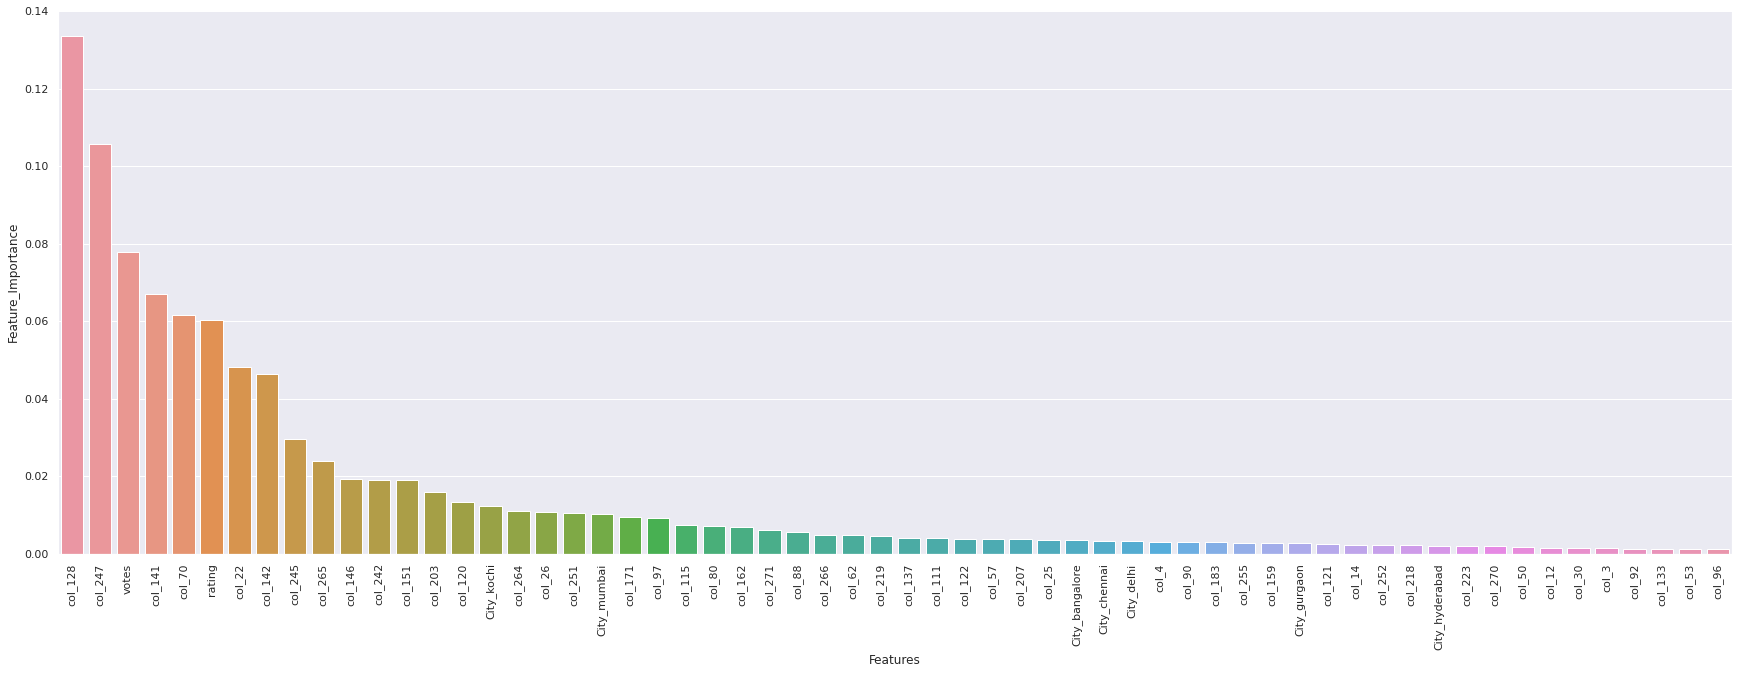

In [287]:
#top_importance.plot.bar(x='Features', y='Feature_Importance')
plt.figure(figsize=(30,10))
sns.barplot(x = 'Features', y= 'Feature_Importance', data = top_importance)
plt.xticks(rotation=90)
plt.show()

## Concluding remarks:
1. A mix of all the features are affecting the cost of a restaurant.
2. Number of votes and the rating seem to be affecting the cost of a restarant more.
3. The Cities in which the restaurant is established is also affecting the cost.

